In [10]:
import geopandas as gpd
import numpy as np

In [11]:
gdf = gpd.read_file("..\..\Data\Results\PT-FireProg_v2.1_L2_final_complete.shp")

for col in gdf.columns:
    print(col)

fid
fname
year
id
type
sdate
edate
inidoy
enddoy
source
zp_link
burn_perio
area
growth_rat
ros_i
ros_p
spdir_i
spdir_p
int_i
int_p
duration_i
duration_p
qc
elev_av
aspect_av
landform
land_use
land_use_d
1_3y_fir_p
3_8y_fir_p
8_ny_fir_p
fuel_model
f_load_av
sW_1m_av
sW_3m_av
sW_7_av
sW_28_av
sW_100_av
sW_289_av
t_2m_C_av
d_2m_C_av
rh_2m_av
VPD_Pa_av
sP_hPa_av
gp_m2s2_av
dfmc_av
HDW_av
Haines_av
FWI_12h_av
DC_12h_av
FFMC_12h_a
wv10_kh_av
wdir10_av
wv100_k_av
wdir100_av
Recirc
CircVar
t_950_av
t_850_av
t_700_av
t_500_av
t_300_av
rh_950_av
rh_850_av
rh_700_av
rh_500_av
rh_300_av
wv_950_av
wv_850_av
wv_700_av
wv_500_av
wv_300_av
wdi_950_av
wdi_850_av
wdi_700_av
wdi_500_av
wdi_300_av
vwv_950_av
vwv_850_av
vwv_700_av
vwv_500_av
vwv_300_av
gp_950_av
gp_850_av
gp_700_av
gp_500_av
gp_300_av
gT_s_9_av
gT_9_8_av
gT_8_7_av
gT_7_5_av
gT_5_3_av
wSv_9_av
wSdir_9_av
wSv_7_av
wSdir_7_av
wSv_5_av
wSdir_5_av
wSv_1_av
wSdir_1_av
CBH_m_av
HigCC_p_av
LowCC_p_av
MidCC_p_av
TotCC_p_av
Cape_av
Cin_av
BLH_m_av
B

In [12]:
print(gdf.head())

   fid              fname  year   id type                sdate  \
0   29  Abrantes_09082017  2017  331    z  2017-08-09 18:00:00   
1   29  Abrantes_09082017  2017  334    p  2017-08-09 18:00:00   
2   29  Abrantes_09082017  2017  335    p  2017-08-09 23:00:00   
3   29  Abrantes_09082017  2017  336    p  2017-08-09 23:00:00   
4   29  Abrantes_09082017  2017  333    z  2017-08-10 12:00:00   

                 edate      inidoy      enddoy    source  ...  SHAP_Cape_  \
0                  NaT   -1.000000   -1.000000      fops  ...         NaN   
1  2017-08-09 23:00:00  221.750000  221.958333      fops  ...    0.164270   
2  2017-08-10 03:00:00  221.958333  222.125000  fops,sat  ...    0.134503   
3  2017-08-10 03:00:00  221.958333  222.125000  fops,sat  ...    0.143561   
4                  NaT   -1.000000   -1.000000       sat  ...         NaN   

   SHAP_gT_8_   pred_log  actual_log  outlier     PredROS     PredErr  \
0         NaN        NaN         NaN        0         NaN         N

In [13]:
# colunas fixas obrigatórias
keep_fixed = [
    "fid", "fname", "year", "id", "type", "sdate", "edate",
    "zp_link", "burn_perio", "area", "ros_p",
    "pred_log", "actual_log", "outlier",
    "PredROS", "PredErr", "PctErr", "geometry"
]

# todas as colunas SHAP_
shap_cols = [c for c in gdf.columns if c.startswith("SHAP_")]

# agora encontrar colunas correspondentes por prefixo
associated_cols = []

for shap in shap_cols:
    prefix = shap.replace("SHAP_", "")
    # adicionar todas as colunas que começam com esse prefixo
    matches = [c for c in gdf.columns if c.startswith(prefix)]
    associated_cols.extend(matches)

# retirar duplicados
associated_cols = list(set(associated_cols))

# colunas finais
cols_to_keep = keep_fixed + shap_cols + associated_cols
cols_to_keep = [c for c in cols_to_keep if c != 'duration_i']


# filtrar o GeoDataFrame

gdf_filtered = gdf[cols_to_keep].copy()

gdf_filtered['outlier_s'] = np.where(
    (gdf_filtered['PredErr'] > 0) & (gdf_filtered['outlier'] == 1),
    1,
    np.where(
        (gdf_filtered['PredErr'] < 0) & (gdf_filtered['outlier'] == 1),
        -1,
        np.nan
    )
)

gdf_filtered['duration_p_'] = gdf_filtered['duration_p']

for col in gdf_filtered.columns:
    print(col)

fid
fname
year
id
type
sdate
edate
zp_link
burn_perio
area
ros_p
pred_log
actual_log
outlier
PredROS
PredErr
PctErr
geometry
SHAP_durat
SHAP_sW_10
SHAP_8_ny_
SHAP_3_8y_
SHAP_f_loa
SHAP_f_sta
SHAP_FWI_1
SHAP_wv100
SHAP_wv_85
SHAP_Cape_
SHAP_gT_8_
gT_8_7_av
wv100_k_av
f_load_av
wv_850_av
duration_p
Cape_av
3_8y_fir_p
f_start
8_ny_fir_p
sW_100_av
FWI_12h_av
outlier_s
duration_p_


In [14]:
ordered_cols = [
    "fid",
    "fname",
    "year",
    "id",
    "type",
    "sdate",
    "edate",
    "zp_link",
    "burn_perio",
    "area",
    "duration_p",
    "pred_log",
    "actual_log",
    "ros_p",
    "PredROS",
    "PredErr",
    "PctErr",
    "outlier",
    "outlier_s",
    "SHAP_durat",
    "SHAP_sW_10",
    "SHAP_8_ny_",
    "SHAP_3_8y_",
    "SHAP_f_loa",
    "SHAP_f_sta",
    "SHAP_FWI_1",
    "SHAP_wv100",
    "SHAP_wv_85",
    "SHAP_Cape_",
    "SHAP_gT_8_",
    "duration_p_",
    "sW_100_av",
    "8_ny_fir_p",  
    "3_8y_fir_p",
    "f_load_av",
    "f_start",
    "FWI_12h_av",
    "wv100_k_av",
    "wv_850_av",
    "Cape_av",
    "gT_8_7_av",
    "geometry",
]

gdf_filtered = gdf_filtered[ordered_cols]

print(gdf_filtered.head())

for col in gdf_filtered.columns:
    print(col)

df = gdf_filtered

   fid              fname  year   id type                sdate  \
0   29  Abrantes_09082017  2017  331    z  2017-08-09 18:00:00   
1   29  Abrantes_09082017  2017  334    p  2017-08-09 18:00:00   
2   29  Abrantes_09082017  2017  335    p  2017-08-09 23:00:00   
3   29  Abrantes_09082017  2017  336    p  2017-08-09 23:00:00   
4   29  Abrantes_09082017  2017  333    z  2017-08-10 12:00:00   

                 edate  zp_link  burn_perio    area  ...  8_ny_fir_p  \
0                  NaT        1           1   -1.00  ...  100.000000   
1  2017-08-09 23:00:00        1           1  501.25  ...   97.038153   
2  2017-08-10 03:00:00        1           2  127.50  ...  100.000000   
3  2017-08-10 03:00:00        1           2   69.75  ...   97.841727   
4                  NaT        2           4   -1.00  ...   89.423077   

   3_8y_fir_p  f_load_av  f_start  FWI_12h_av  wv100_k_av  wv_850_av  Cape_av  \
0         0.0  34.670000      0.0         NaN         NaN        NaN      NaN   
1       

Plot 1: Distribuição e Tipos de Outliers


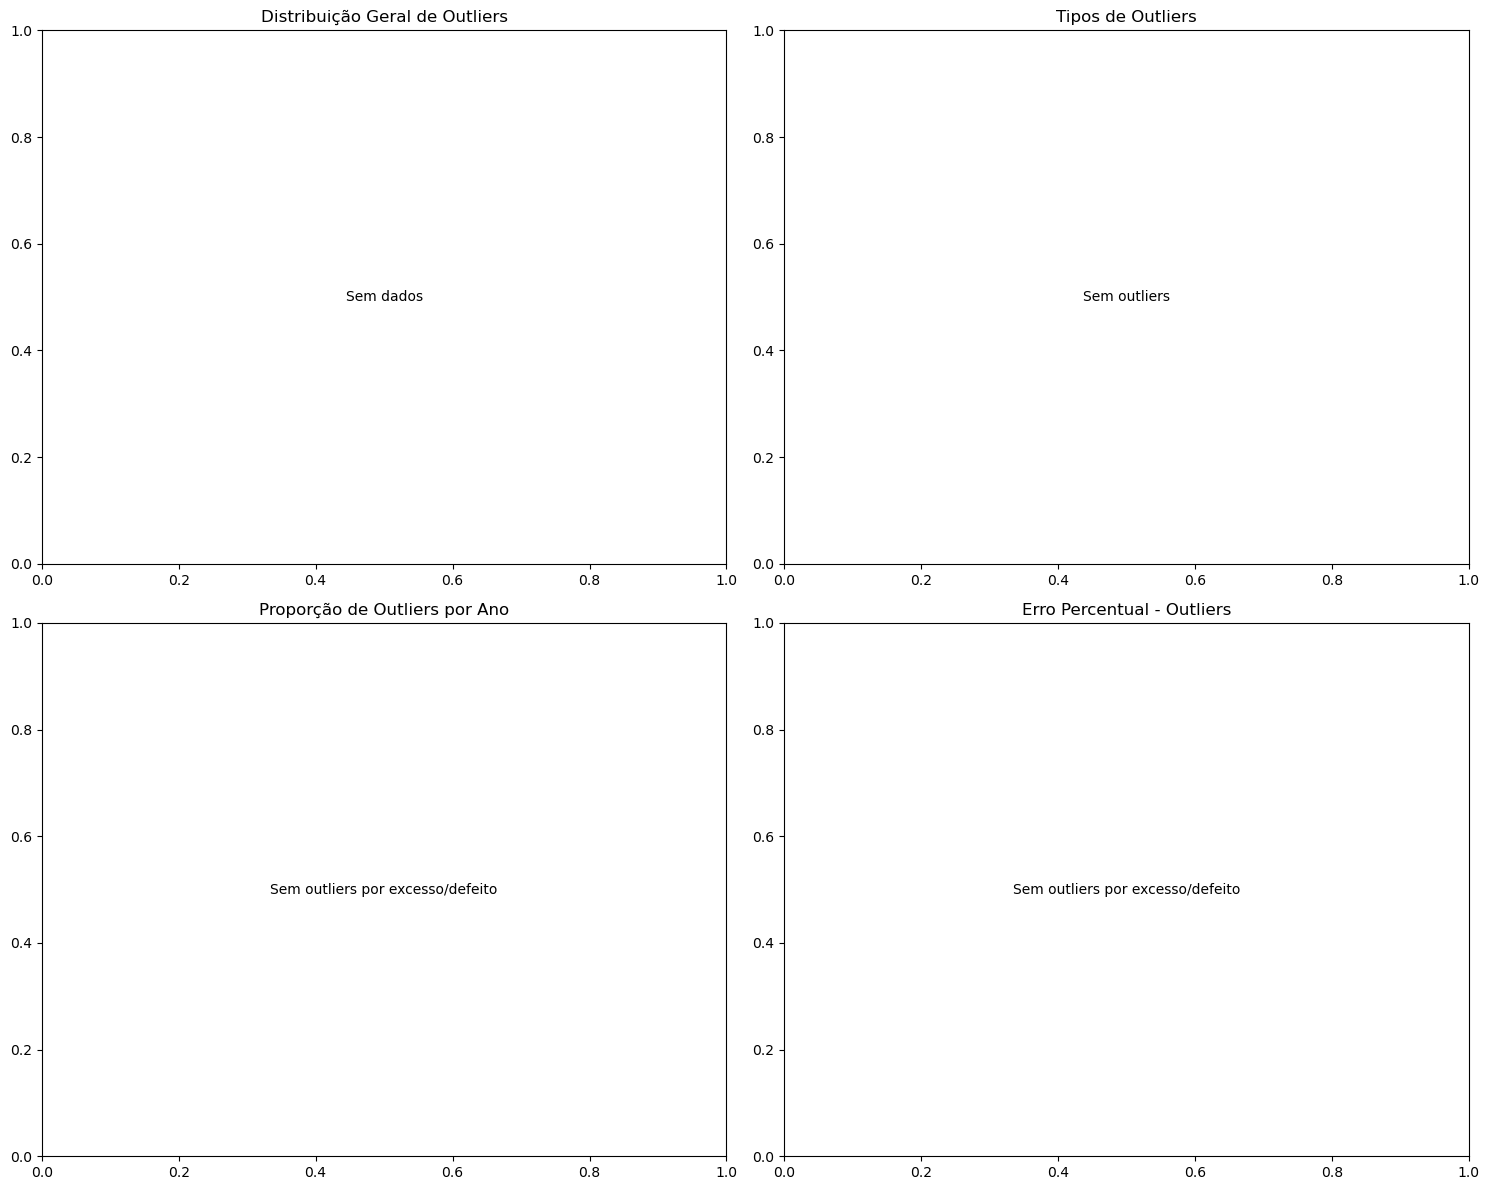

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurações de estilo
plt.style.use('default')
sns.set_palette("viridis")

print("Plot 1: Distribuição e Tipos de Outliers")

# Converter outlier de T/F para booleano
def convert_outlier(val):
    if pd.isna(val):
        return np.nan
    val_str = str(val).strip().upper()
    if val_str == 1:
        return True
    elif val_str == 0:
        return False
    else:
        return np.nan

df['outlier_bool'] = df['outlier'].apply(convert_outlier)
df_clean = df.dropna(subset=['outlier_bool']).copy()

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Distribuição geral de outliers
outlier_counts = df_clean['outlier_bool'].value_counts()

labels = []
sizes = []
colors = []

if True in outlier_counts.index:
    labels.append('Outlier (T)')
    sizes.append(outlier_counts[True])
    colors.append('salmon')
if False in outlier_counts.index:
    labels.append('Não-Outlier (F)')
    sizes.append(outlier_counts[False])
    colors.append('lightblue')

if sizes:
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
else:
    ax1.text(0.5, 0.5, 'Sem dados', ha='center', va='center', transform=ax1.transAxes)
ax1.set_title('Distribuição Geral de Outliers')

# Tipos de outliers (por defeito/excesso)
if 'outlier_s' in df_clean.columns:
    df_clean['outlier_s'] = pd.to_numeric(df_clean['outlier_s'], errors='coerce')
    outlier_s_counts = df_clean[df_clean['outlier_bool'] == True]['outlier_s'].value_counts()
    if len(outlier_s_counts) > 0:
        labels = []
        sizes = []
        colors = []
        if 1 in outlier_s_counts.index:
            labels.append('Excesso')
            sizes.append(outlier_s_counts[1])
            colors.append('red')
        if -1 in outlier_s_counts.index:
            labels.append('Defeito')
            sizes.append(outlier_s_counts[-1])
            colors.append('orange')
        if sizes:
            ax2.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors)
        else:
            ax2.text(0.5, 0.5, 'Sem tipos de outliers', ha='center', va='center', transform=ax2.transAxes)
    else:
        ax2.text(0.5, 0.5, 'Sem outliers', ha='center', va='center', transform=ax2.transAxes)
else:
    ax2.text(0.5, 0.5, 'outlier_s não encontrado', ha='center', va='center', transform=ax2.transAxes)
ax2.set_title('Tipos de Outliers')

# Proporção de outliers por ano - COM CORES PARA EXCESSO E DEFEITO
if 'year' in df_clean.columns and 'outlier_s' in df_clean.columns:
    df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
    df_clean['outlier_s'] = pd.to_numeric(df_clean['outlier_s'], errors='coerce')
    
    # Criar dados agregados por ano e tipo de outlier
    yearly_outliers = df_clean[df_clean['outlier_s'].isin([1, -1])].groupby(['year', 'outlier_s']).size().unstack(fill_value=0)
    
    if len(yearly_outliers) > 0:
        # Plot com cores diferentes para excesso e defeito
        colors = ['red', 'orange']
        labels = ['Excesso', 'Defeito']
        
        yearly_outliers.plot(kind='bar', ax=ax3, color=colors, stacked=True)
        ax3.set_title('Proporção de Outliers por Ano\n(Excesso vs Defeito)')
        ax3.set_ylabel('Número de Outliers')
        ax3.set_xlabel('Ano')
        ax3.tick_params(axis='x', rotation=45)
        ax3.legend(labels)
    else:
        ax3.text(0.5, 0.5, 'Sem outliers por excesso/defeito', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Proporção de Outliers por Ano')
elif 'year' in df_clean.columns:
    df_clean['year'] = pd.to_numeric(df_clean['year'], errors='coerce')
    outlier_by_year = df_clean.groupby('year')['outlier_bool'].mean()
    if len(outlier_by_year) > 0:
        outlier_by_year.plot(kind='bar', ax=ax3, color='skyblue')
        ax3.set_title('Proporção de Outliers por Ano')
        ax3.set_ylabel('Proporção de Outliers')
        ax3.tick_params(axis='x', rotation=45)
    else:
        ax3.text(0.5, 0.5, 'Sem dados por ano', ha='center', va='center', transform=ax3.transAxes)
        ax3.set_title('Proporção de Outliers por Ano')
else:
    ax3.text(0.5, 0.5, 'year não encontrado', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Proporção de Outliers por Ano')

# Distribuição do erro percentual - SCATTER PLOT PARA OUTLIERS
if 'PctErr' in df_clean.columns and 'outlier_s' in df_clean.columns:
    df_clean['PctErr'] = pd.to_numeric(df_clean['PctErr'], errors='coerce')
    df_clean['outlier_s'] = pd.to_numeric(df_clean['outlier_s'], errors='coerce')
    
    # Filtrar apenas outliers por excesso (1) e defeito (-1)
    outliers_only = df_clean[df_clean['outlier_s'].isin([1, -1])].copy()
    
    if len(outliers_only) > 0:
        # Mapear valores para labels mais descritivos e cores
        outliers_only['outlier_type'] = outliers_only['outlier_s'].map({1: 'Excesso', -1: 'Defeito'})
        colors = {'Excesso': 'red', 'Defeito': 'orange'}
        
        # Scatter plot
        for outlier_type in ['Excesso', 'Defeito']:
            data = outliers_only[outliers_only['outlier_type'] == outlier_type]
            ax4.scatter(data.index, data['PctErr'], 
                       alpha=0.7, label=outlier_type, color=colors[outlier_type])
        
        ax4.set_title('Distribuição do Erro Percentual\n(Somente Outliers)')
        ax4.set_xlabel('Índice do Registro')
        ax4.set_ylabel('Erro Percentual (%)')
        ax4.axhline(y=0, color='black', linestyle='--', alpha=0.5)
        ax4.legend()
        ax4.grid(True, alpha=0.3)
    else:
        ax4.text(0.5, 0.5, 'Sem outliers por excesso/defeito', ha='center', va='center', transform=ax4.transAxes)
        ax4.set_title('Erro Percentual - Outliers')
else:
    ax4.text(0.5, 0.5, 'PctErr ou outlier_s não encontrado', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Erro Percentual - Outliers')

plt.tight_layout()
plt.show()

Plot 2: Análise de Erros de Predição


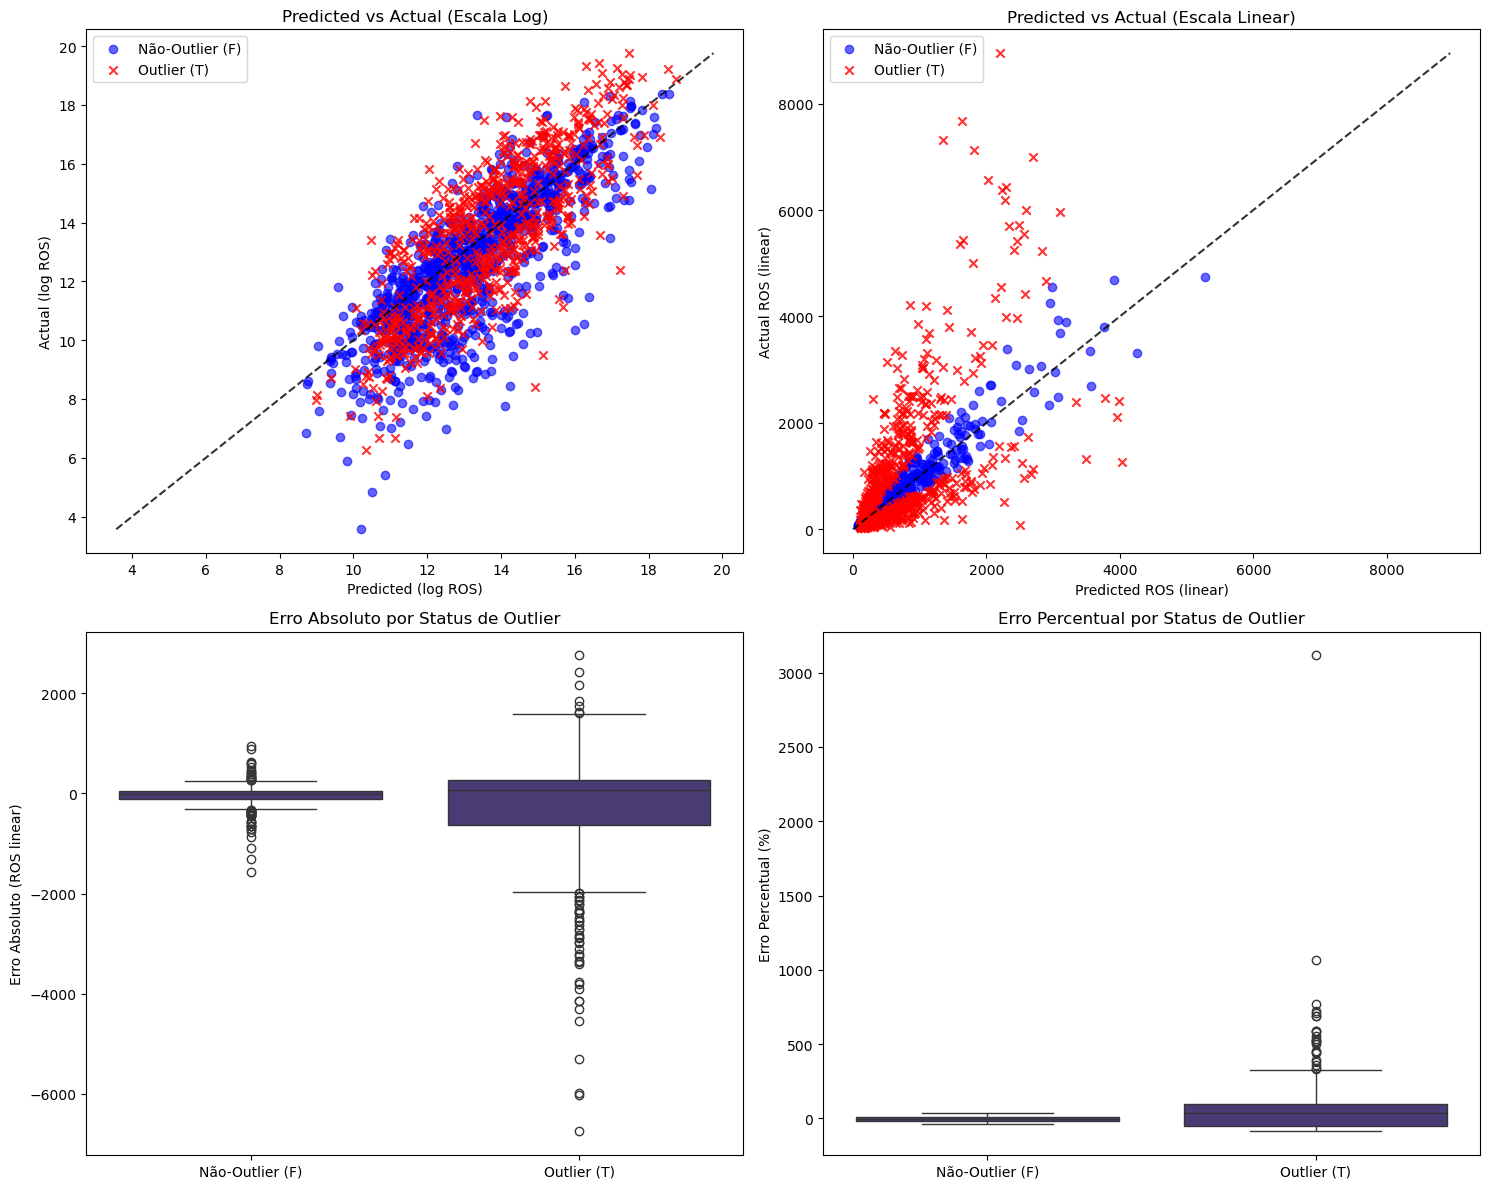

In [16]:
print("Plot 2: Análise de Erros de Predição")

# Criar máscara para outliers (T = True)
mask = df['outlier'] == 1

# Converter colunas para numérico
numeric_cols = ['pred_log', 'actual_log', 'PredROS', 'ros_p', 'PredErr', 'PctErr']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Predicted vs Actual (escala log)
if all(col in df.columns for col in ['pred_log', 'actual_log']):
    ax1.scatter(df[~mask]['pred_log'], df[~mask]['actual_log'], 
               alpha=0.6, label='Não-Outlier (F)', color='blue')
    ax1.scatter(df[mask]['pred_log'], df[mask]['actual_log'], 
               alpha=0.8, label='Outlier (T)', color='red', marker='x')
    min_val = min(df['pred_log'].min(), df['actual_log'].min())
    max_val = max(df['pred_log'].max(), df['actual_log'].max())
    ax1.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8)
    ax1.set_xlabel('Predicted (log ROS)')
    ax1.set_ylabel('Actual (log ROS)')
    ax1.set_title('Predicted vs Actual (Escala Log)')
    ax1.legend()
else:
    ax1.text(0.5, 0.5, 'Dados faltando', ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Predicted vs Actual (Log)')

# Predicted vs Actual (escala linear)
if all(col in df.columns for col in ['PredROS', 'ros_p']):
    ax2.scatter(df[~mask]['PredROS'], df[~mask]['ros_p'], 
               alpha=0.6, label='Não-Outlier (F)', color='blue')
    ax2.scatter(df[mask]['PredROS'], df[mask]['ros_p'], 
               alpha=0.8, label='Outlier (T)', color='red', marker='x')
    min_val = min(df['PredROS'].min(), df['ros_p'].min())
    max_val = max(df['PredROS'].max(), df['ros_p'].max())
    ax2.plot([min_val, max_val], [min_val, max_val], 'k--', alpha=0.8)
    ax2.set_xlabel('Predicted ROS (linear)')
    ax2.set_ylabel('Actual ROS (linear)')
    ax2.set_title('Predicted vs Actual (Escala Linear)')
    ax2.legend()
else:
    ax2.text(0.5, 0.5, 'Dados faltando', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Predicted vs Actual (Linear)')

# Distribuição do erro absoluto
if 'PredErr' in df.columns:
    # Criar coluna temporária para o boxplot
    df_temp = df.copy()
    df_temp['outlier_label'] = df_temp['outlier'].map({1: 'Outlier (T)', 0: 'Não-Outlier (F)'})
    sns.boxplot(data=df_temp, x='outlier_label', y='PredErr', ax=ax3)
    ax3.set_title('Erro Absoluto por Status de Outlier')
    ax3.set_ylabel('Erro Absoluto (ROS linear)')
    ax3.set_xlabel('')
else:
    ax3.text(0.5, 0.5, 'PredErr não encontrado', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Erro Absoluto')

# Distribuição do erro percentual
if 'PctErr' in df.columns:
    # Criar coluna temporária para o boxplot
    df_temp = df.copy()
    df_temp['outlier_label'] = df_temp['outlier'].map({1: 'Outlier (T)', 0: 'Não-Outlier (F)'})
    sns.boxplot(data=df_temp, x='outlier_label', y='PctErr', ax=ax4)
    ax4.set_title('Erro Percentual por Status de Outlier')
    ax4.set_ylabel('Erro Percentual (%)')
    ax4.set_xlabel('')
else:
    ax4.text(0.5, 0.5, 'PctErr não encontrado', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('Erro Percentual')

plt.tight_layout()
plt.show()

Plot 4: Análise Temporal


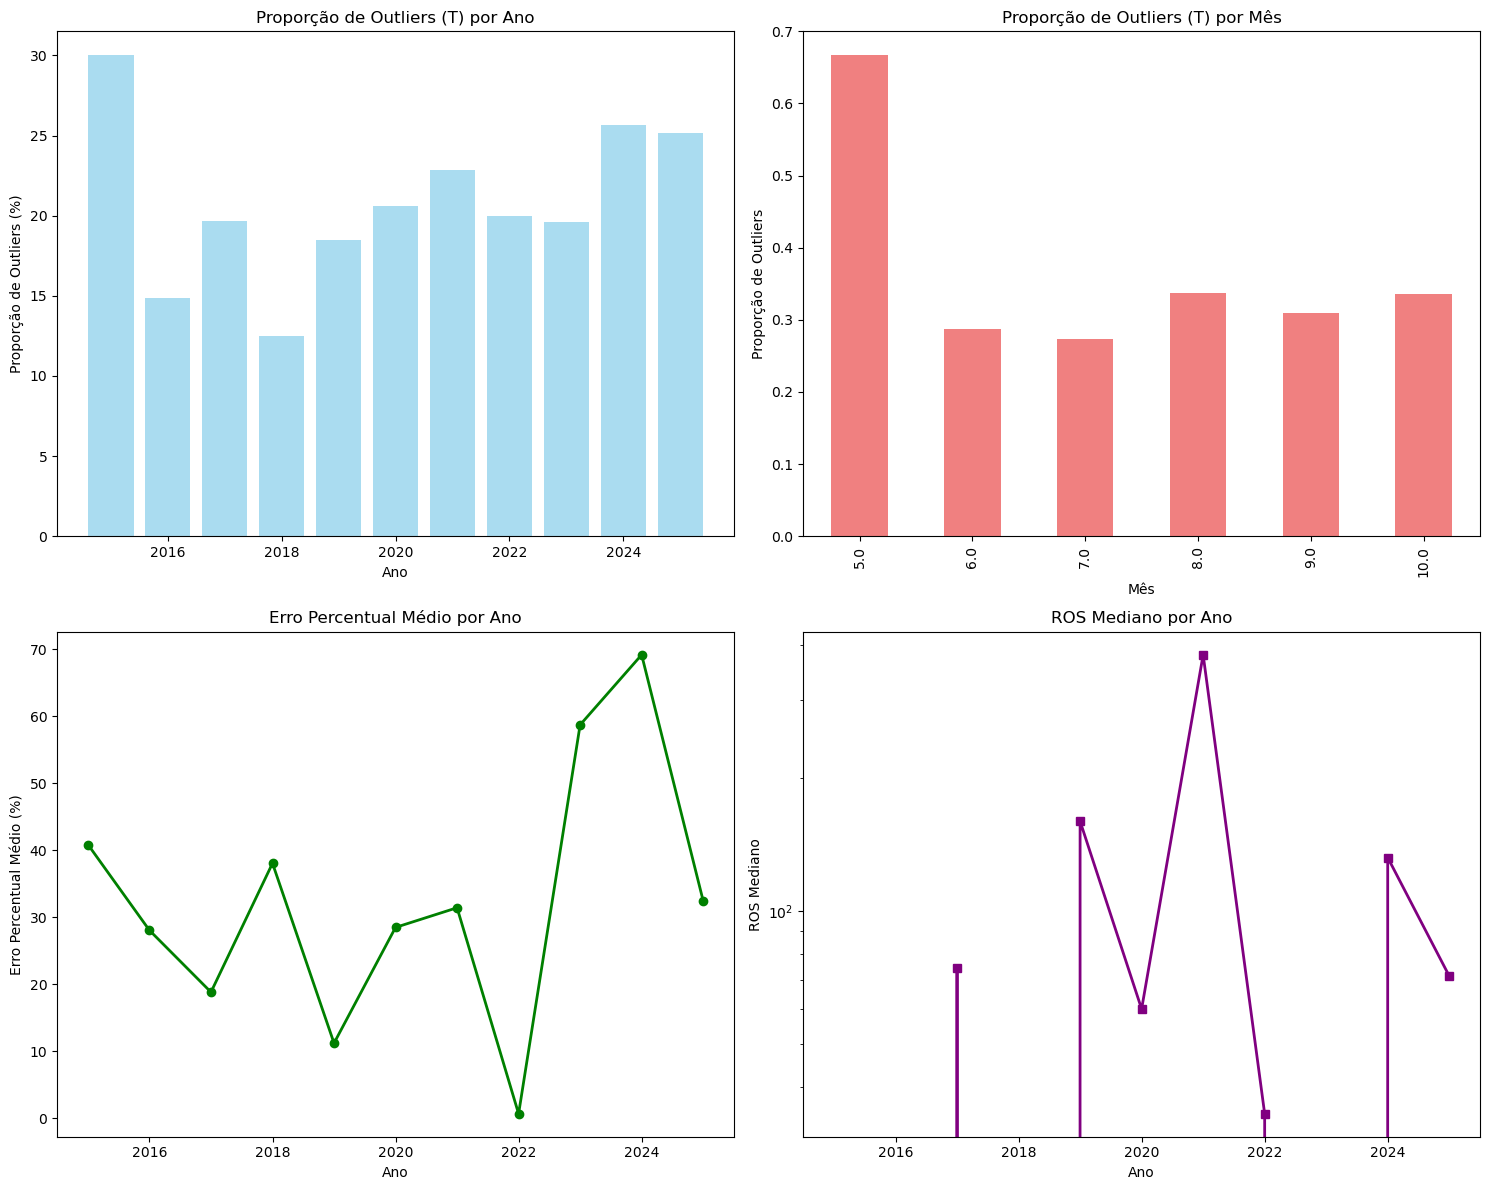

In [17]:
print("Plot 4: Análise Temporal")

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

# Converter outlier para numérico (T=1, F=0) para cálculos
df['outlier_numeric'] = df['outlier'].map({1: 1, 0: 0})

# Tendência temporal de outliers
if 'year' in df.columns:
    df['year'] = pd.to_numeric(df['year'], errors='coerce')
    yearly_stats = df.groupby('year').agg({
        'outlier_numeric': 'mean',
        'PctErr': 'mean'
    }).reset_index()
    
    ax1.bar(yearly_stats['year'], yearly_stats['outlier_numeric']*100, alpha=0.7, color='skyblue')
    ax1.set_title('Proporção de Outliers (T) por Ano')
    ax1.set_ylabel('Proporção de Outliers (%)')
    ax1.set_xlabel('Ano')
else:
    ax1.text(0.5, 0.5, 'year não encontrado', ha='center', va='center', transform=ax1.transAxes)
    ax1.set_title('Outliers por Ano')

# Sazonalidade
if 'sdate' in df.columns:
    try:
        df['month'] = pd.to_datetime(df['sdate'], errors='coerce').dt.month
        monthly_outliers = df[df['month'].notna()].groupby('month')['outlier_numeric'].mean()
        monthly_outliers.plot(kind='bar', ax=ax2, color='lightcoral')
        ax2.set_title('Proporção de Outliers (T) por Mês')
        ax2.set_xlabel('Mês')
        ax2.set_ylabel('Proporção de Outliers')
    except Exception as e:
        ax2.text(0.5, 0.5, f'Erro: {str(e)}', ha='center', va='center', transform=ax2.transAxes)
        ax2.set_title('Sazonalidade - Erro')
else:
    ax2.text(0.5, 0.5, 'sdate não encontrado', ha='center', va='center', transform=ax2.transAxes)
    ax2.set_title('Sazonalidade')

# Erro médio por ano
if 'year' in df.columns and 'PctErr' in df.columns:
    ax3.plot(yearly_stats['year'], yearly_stats['PctErr'], marker='o', linewidth=2, color='green')
    ax3.set_title('Erro Percentual Médio por Ano')
    ax3.set_ylabel('Erro Percentual Médio (%)')
    ax3.set_xlabel('Ano')
else:
    ax3.text(0.5, 0.5, 'Dados faltando', ha='center', va='center', transform=ax3.transAxes)
    ax3.set_title('Erro por Ano')

# ROS médio por ano
if 'year' in df.columns and 'ros_p' in df.columns:
    yearly_ros = df.groupby('year')['ros_p'].median().reset_index()
    ax4.plot(yearly_ros['year'], yearly_ros['ros_p'], marker='s', linewidth=2, color='purple')
    ax4.set_title('ROS Mediano por Ano')
    ax4.set_ylabel('ROS Mediano')
    ax4.set_xlabel('Ano')
    ax4.set_yscale('log')
else:
    ax4.text(0.5, 0.5, 'Dados faltando', ha='center', va='center', transform=ax4.transAxes)
    ax4.set_title('ROS por Ano')

plt.tight_layout()
plt.show()

C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\4006614303.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outlier_str', y=shap_var, ax=axes[i],
C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\4006614303.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outlier_str', y=shap_var, ax=axes[i],
C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\4006614303.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outlier_str', y=shap_var, ax=axes[i],
C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\400661430

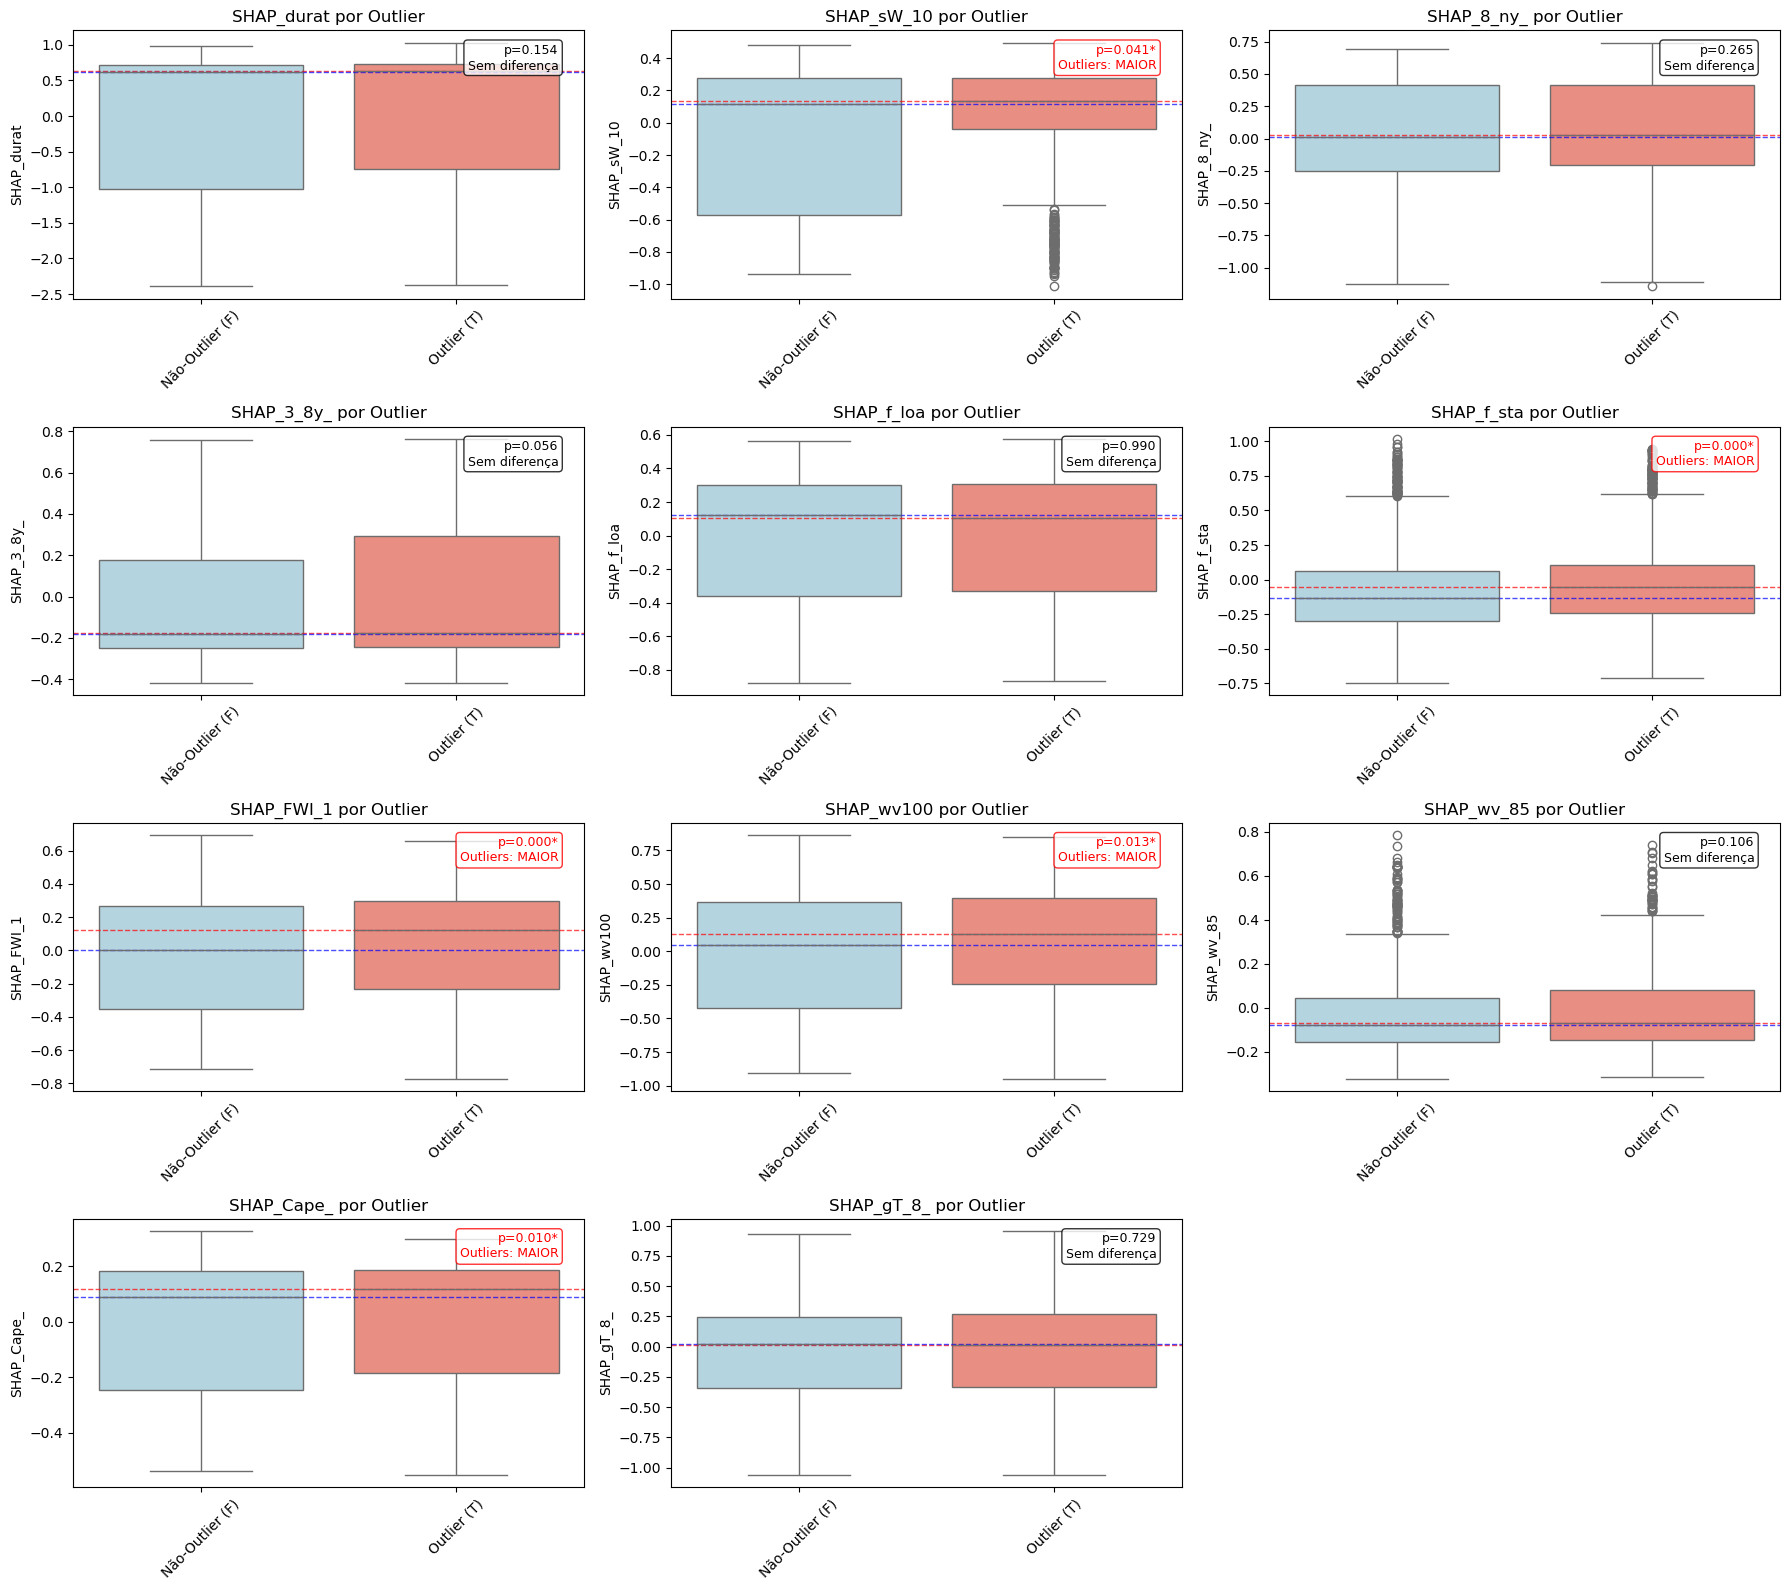


=== RESUMO DOS TESTES DE HIPÓTESE (USANDO MEDIANAS) ===
H0: Não há diferença nas distribuições SHAP entre outliers e não-outliers
H1: Há diferença nas distribuições SHAP entre outliers e não-outliers
Teste: Mann-Whitney U (não paramétrico) - compara distribuições
Direção baseada na MEDIANA (mais robusta para dados não normais)

  Variável  p_value  Outliers_median  NonOutliers_median       Direção     Significância
SHAP_f_sta   0.0000          -0.0527             -0.1336         MAIOR    SIGNIFICATIVO*
SHAP_FWI_1   0.0001           0.1233             -0.0003         MAIOR    SIGNIFICATIVO*
SHAP_Cape_   0.0103           0.1196              0.0883         MAIOR    SIGNIFICATIVO*
SHAP_wv100   0.0133           0.1270              0.0476         MAIOR    SIGNIFICATIVO*
SHAP_sW_10   0.0408           0.1360              0.1158         MAIOR    SIGNIFICATIVO*
SHAP_3_8y_   0.0562          -0.1744             -0.1824 SEM DIFERENÇA NÃO SIGNIFICATIVO
SHAP_wv_85   0.1063          -0.0710          

In [18]:
# Variáveis SHAP
shap_vars = [col for col in df.columns if 'SHAP' in col]

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

# Converter outlier para string para os boxplots
df['outlier_str'] = df['outlier'].map({1: 'Outlier (T)', 0: 'Não-Outlier (F)'})

for i, shap_var in enumerate(shap_vars[:12]):  # Mostra as primeiras 12
    if shap_var in df.columns:
        # Boxplot com cores
        sns.boxplot(data=df, x='outlier_str', y=shap_var, ax=axes[i], 
                   palette={'Outlier (T)': 'salmon', 'Não-Outlier (F)': 'lightblue'})
        axes[i].set_title(f'{shap_var} por Outlier')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Teste de hipótese (Mann-Whitney U test)
        from scipy.stats import mannwhitneyu
        
        # Usar a coluna booleana original para o teste
        outliers_shap = df[df['outlier'] == 1][shap_var].dropna()
        non_outliers_shap = df[df['outlier'] == 0][shap_var].dropna()
        
        if len(outliers_shap) > 0 and len(non_outliers_shap) > 0:
            try:
                stat, p_value = mannwhitneyu(outliers_shap, non_outliers_shap, alternative='two-sided')
                
                # CORREÇÃO: Usar MEDIANA em vez de média
                median_outliers = outliers_shap.median()
                median_non_outliers = non_outliers_shap.median()
                
                if p_value < 0.05:
                    if median_outliers > median_non_outliers:
                        direction = "MAIOR"
                        color = "red"
                    else:
                        direction = "MENOR"
                        color = "blue"
                    significance = f"p={p_value:.3f}*\nOutliers: {direction}"
                else:
                    significance = f"p={p_value:.3f}\nSem diferença"
                    color = "black"
                
                # Adicionar anotação com o teste
                axes[i].text(0.95, 0.95, significance, transform=axes[i].transAxes, 
                           ha='right', va='top', fontsize=9, bbox=dict(boxstyle="round,pad=0.3", 
                           facecolor='white', alpha=0.8, edgecolor=color),
                           color=color)
                
                # Adicionar linhas de mediana no gráfico para facilitar a visualização
                axes[i].axhline(y=median_outliers, color='red', linestyle='--', alpha=0.7, linewidth=1)
                axes[i].axhline(y=median_non_outliers, color='blue', linestyle='--', alpha=0.7, linewidth=1)
                
            except Exception as e:
                axes[i].text(0.5, 0.5, f'Erro no teste\n{str(e)[:20]}...', 
                           transform=axes[i].transAxes, ha='center', va='center',
                           fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow'))

# Remove eixos vazios
for i in range(len(shap_vars[:12]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Tabela resumo dos testes de hipótese - VERSÃO CORRIGIDA
print("\n=== RESUMO DOS TESTES DE HIPÓTESE (USANDO MEDIANAS) ===")
print("H0: Não há diferença nas distribuições SHAP entre outliers e não-outliers")
print("H1: Há diferença nas distribuições SHAP entre outliers e não-outliers")
print("Teste: Mann-Whitney U (não paramétrico) - compara distribuições")
print("Direção baseada na MEDIANA (mais robusta para dados não normais)\n")

results = []
for shap_var in shap_vars:
    if shap_var in df.columns:
        outliers_shap = df[df['outlier'] == 1][shap_var].dropna()
        non_outliers_shap = df[df['outlier'] == 0][shap_var].dropna()
        
        if len(outliers_shap) > 0 and len(non_outliers_shap) > 0:
            try:
                stat, p_value = mannwhitneyu(outliers_shap, non_outliers_shap, alternative='two-sided')
                
                # CORREÇÃO: Usar MEDIANA em vez de média
                median_outliers = outliers_shap.median()
                median_non_outliers = non_outliers_shap.median()
                
                if p_value < 0.05:
                    if median_outliers > median_non_outliers:
                        direction = "MAIOR"
                        significance = "SIGNIFICATIVO*"
                    else:
                        direction = "MENOR"
                        significance = "SIGNIFICATIVO*"
                else:
                    direction = "SEM DIFERENÇA"
                    significance = "NÃO SIGNIFICATIVO"
                
                results.append({
                    'Variável': shap_var,
                    'p_value': p_value,
                    'Outliers_median': median_outliers,  # Mudou para median
                    'NonOutliers_median': median_non_outliers,  # Mudou para median
                    'Direção': direction,
                    'Significância': significance
                })
            except Exception as e:
                print(f"Erro em {shap_var}: {e}")

# Criar dataframe com resultados
if results:
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('p_value')
    print(results_df.to_string(index=False, float_format='%.4f'))
    
    # Estatísticas gerais
    significant_vars = results_df[results_df['Significância'] == 'SIGNIFICATIVO*']
    print(f"\nVariáveis significativas (p < 0.05): {len(significant_vars)}/{len(results_df)}")
    
    if len(significant_vars) > 0:
        maior_count = len(significant_vars[significant_vars['Direção'] == 'MAIOR'])
        menor_count = len(significant_vars[significant_vars['Direção'] == 'MENOR'])
        print(f"Outliers têm medianas MAIORES em {maior_count} variáveis")  # Atualizado texto
        print(f"Outliers têm medianas MENORES em {menor_count} variáveis")  # Atualizado texto
        
        # Top 5 variáveis mais significativas onde outliers são maiores
        top_maior = significant_vars[significant_vars['Direção'] == 'MAIOR'].head(5)
        if len(top_maior) > 0:
            print(f"\nTop {len(top_maior)} variáveis onde outliers têm medianas MAIORES:")
            for _, row in top_maior.iterrows():
                print(f"  {row['Variável']}: p={row['p_value']:.4f} (mediana: {row['Outliers_median']:.4f} vs {row['NonOutliers_median']:.4f})")
        
        # Top 5 variáveis mais significativas onde outliers são menores
        top_menor = significant_vars[significant_vars['Direção'] == 'MENOR'].head(5)
        if len(top_menor) > 0:
            print(f"\nTop {len(top_menor)} variáveis onde outliers têm medianas MENORES:")
            for _, row in top_menor.iterrows():
                print(f"  {row['Variável']}: p={row['p_value']:.4f} (mediana: {row['Outliers_median']:.4f} vs {row['NonOutliers_median']:.4f})")
else:
    print("Não foi possível realizar os testes de hipótese")

Variáveis normais encontradas: 11
['duration_p_', 'sW_100_av', '8_ny_fir_p', '3_8y_fir_p', 'f_load_av', 'f_start', 'FWI_12h_av', 'wv100_k_av', 'wv_850_av', 'Cape_av', 'gT_8_7_av']


C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\4144314279.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outlier_str', y=normal_var, ax=axes[i],
C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\4144314279.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outlier_str', y=normal_var, ax=axes[i],
C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\4144314279.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outlier_str', y=normal_var, ax=axes[i],
C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\414

C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\4144314279.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outlier_str', y=normal_var, ax=axes[i],
C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\4144314279.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outlier_str', y=normal_var, ax=axes[i],
C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\4144314279.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='outlier_str', y=normal_var, ax=axes[i],
C:\Users\dias3\AppData\Local\Temp\ipykernel_3464\414

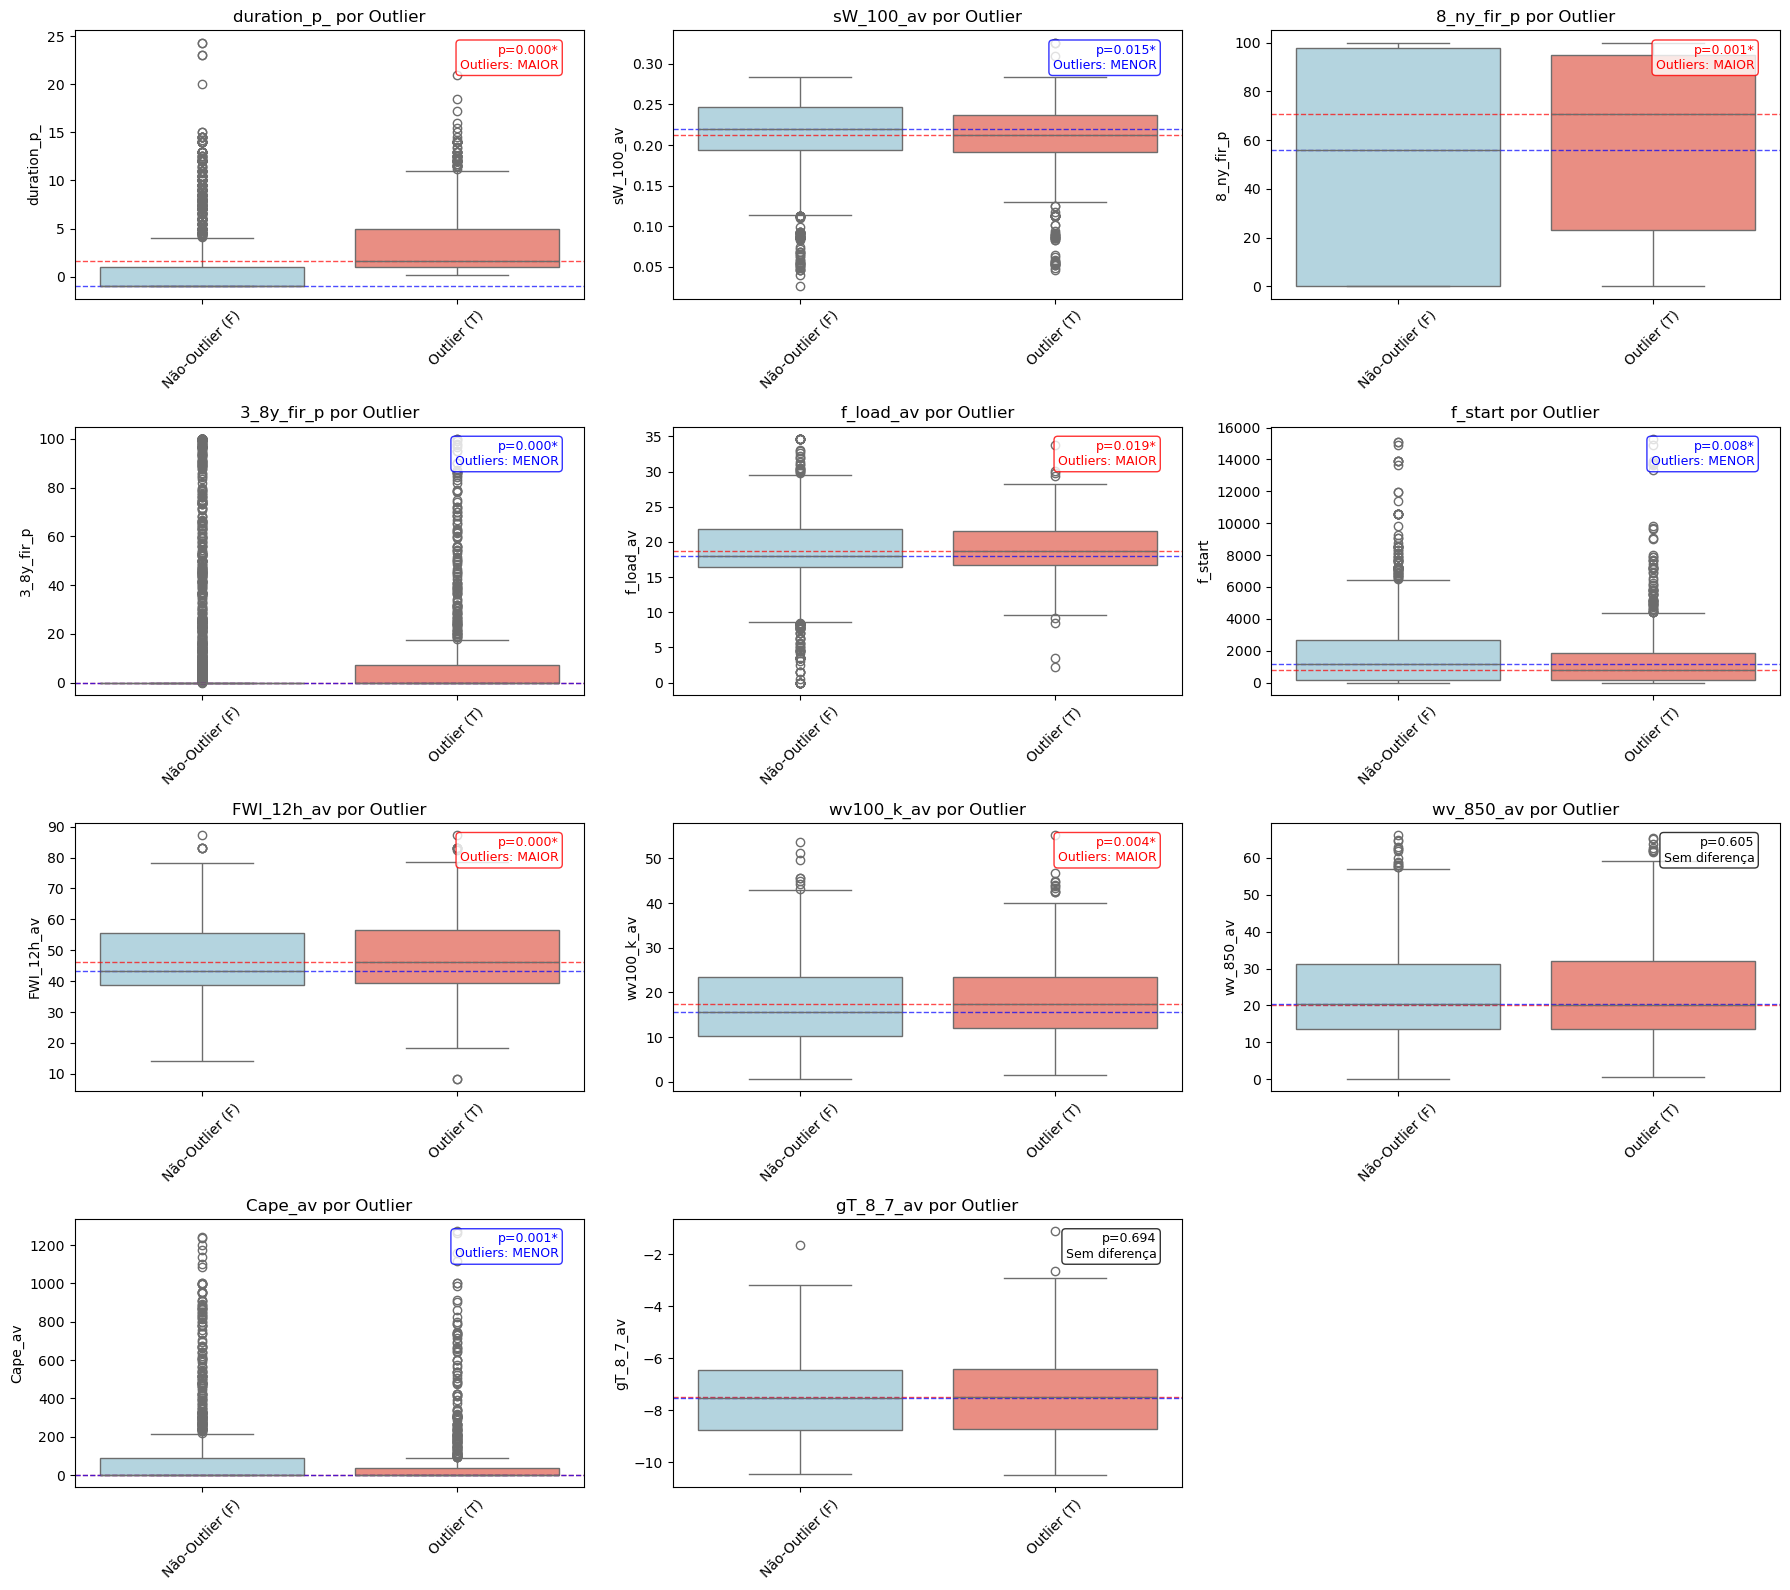


=== RESUMO DOS TESTES DE HIPÓTESE (USANDO MEDIANAS) ===
H0: Não há diferença nas variáveis de input entre outliers e não-outliers
H1: Há diferença nas variáveis de input entre outliers e não-outliers
Teste: Mann-Whitney U (não paramétrico) - compara distribuições
Direção baseada na MEDIANA (mais robusta para dados não normais)

   Variável  p_value  Outliers_median  NonOutliers_median       Direção     Significância
duration_p_   0.0000           1.6667             -1.0000         MAIOR    SIGNIFICATIVO*
 3_8y_fir_p   0.0000           0.0000              0.0000         MENOR    SIGNIFICATIVO*
 FWI_12h_av   0.0004          46.2667             43.1333         MAIOR    SIGNIFICATIVO*
 8_ny_fir_p   0.0007          70.6966             56.0284         MAIOR    SIGNIFICATIVO*
    Cape_av   0.0012           0.0000              0.1678         MENOR    SIGNIFICATIVO*
 wv100_k_av   0.0039          17.4531             15.6468         MAIOR    SIGNIFICATIVO*
    f_start   0.0075         805.0000  

In [19]:
# Mapeamento das variáveis SHAP para as variáveis normais
shap_to_normal = {
    "SHAP_durat": "duration_p_",
    "SHAP_sW_10": "sW_100_av", 
    "SHAP_8_ny_": "8_ny_fir_p",
    "SHAP_3_8y_": "3_8y_fir_p",
    "SHAP_f_loa": "f_load_av",
    "SHAP_f_sta": "f_start",
    "SHAP_FWI_1": "FWI_12h_av",
    "SHAP_wv100": "wv100_k_av",
    "SHAP_wv_85": "wv_850_av",
    "SHAP_Cape_": "Cape_av",
    "SHAP_gT_8_": "gT_8_7_av"
}

# Variáveis normais correspondentes
normal_vars = list(shap_to_normal.values())

# Filtrar apenas as variáveis que existem no dataframe
normal_vars = [var for var in normal_vars if var in df.columns]

print(f"Variáveis normais encontradas: {len(normal_vars)}")
print(normal_vars)

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.ravel()

# Converter outlier para string para os boxplots
df['outlier_str'] = df['outlier'].map({1: 'Outlier (T)', 0: 'Não-Outlier (F)'})

for i, normal_var in enumerate(normal_vars[:12]):  # Mostra as primeiras 12
    if normal_var in df.columns:
        # Boxplot com cores
        sns.boxplot(data=df, x='outlier_str', y=normal_var, ax=axes[i], 
                   palette={'Outlier (T)': 'salmon', 'Não-Outlier (F)': 'lightblue'})
        axes[i].set_title(f'{normal_var} por Outlier')
        axes[i].set_xlabel('')
        axes[i].tick_params(axis='x', rotation=45)
        
        # Teste de hipótese (Mann-Whitney U test)
        from scipy.stats import mannwhitneyu
        
        # Usar a coluna booleana original para o teste
        outliers_normal = df[df['outlier'] == 1][normal_var].dropna()
        non_outliers_normal = df[df['outlier'] == 0][normal_var].dropna()
        
        if len(outliers_normal) > 0 and len(non_outliers_normal) > 0:
            try:
                stat, p_value = mannwhitneyu(outliers_normal, non_outliers_normal, alternative='two-sided')
                
                # CORREÇÃO: Usar MEDIANA em vez de média
                median_outliers = outliers_normal.median()
                median_non_outliers = non_outliers_normal.median()
                
                if p_value < 0.05:
                    if median_outliers > median_non_outliers:
                        direction = "MAIOR"
                        color = "red"
                    else:
                        direction = "MENOR"
                        color = "blue"
                    significance = f"p={p_value:.3f}*\nOutliers: {direction}"
                else:
                    significance = f"p={p_value:.3f}\nSem diferença"
                    color = "black"
                
                # Adicionar anotação com o teste
                axes[i].text(0.95, 0.95, significance, transform=axes[i].transAxes, 
                           ha='right', va='top', fontsize=9, bbox=dict(boxstyle="round,pad=0.3", 
                           facecolor='white', alpha=0.8, edgecolor=color),
                           color=color)
                
                # Adicionar linhas de mediana no gráfico para facilitar a visualização
                axes[i].axhline(y=median_outliers, color='red', linestyle='--', alpha=0.7, linewidth=1)
                axes[i].axhline(y=median_non_outliers, color='blue', linestyle='--', alpha=0.7, linewidth=1)
                
            except Exception as e:
                axes[i].text(0.5, 0.5, f'Erro no teste\n{str(e)[:20]}...', 
                           transform=axes[i].transAxes, ha='center', va='center',
                           fontsize=8, bbox=dict(boxstyle="round,pad=0.3", facecolor='yellow'))

# Remove eixos vazios
for i in range(len(normal_vars[:12]), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

# Tabela resumo dos testes de hipótese - VERSÃO CORRIGIDA
print("\n=== RESUMO DOS TESTES DE HIPÓTESE (USANDO MEDIANAS) ===")
print("H0: Não há diferença nas variáveis de input entre outliers e não-outliers")
print("H1: Há diferença nas variáveis de input entre outliers e não-outliers")
print("Teste: Mann-Whitney U (não paramétrico) - compara distribuições")
print("Direção baseada na MEDIANA (mais robusta para dados não normais)\n")

results = []
for normal_var in normal_vars:
    if normal_var in df.columns:
        outliers_normal = df[df['outlier'] == 1][normal_var].dropna()
        non_outliers_normal = df[df['outlier'] == 0][normal_var].dropna()
        
        if len(outliers_normal) > 0 and len(non_outliers_normal) > 0:
            try:
                stat, p_value = mannwhitneyu(outliers_normal, non_outliers_normal, alternative='two-sided')
                
                # CORREÇÃO: Usar MEDIANA em vez de média
                median_outliers = outliers_normal.median()
                median_non_outliers = non_outliers_normal.median()
                
                if p_value < 0.05:
                    if median_outliers > median_non_outliers:
                        direction = "MAIOR"
                        significance = "SIGNIFICATIVO*"
                    else:
                        direction = "MENOR"
                        significance = "SIGNIFICATIVO*"
                else:
                    direction = "SEM DIFERENÇA"
                    significance = "NÃO SIGNIFICATIVO"
                
                results.append({
                    'Variável': normal_var,
                    'p_value': p_value,
                    'Outliers_median': median_outliers,  # Mudou para median
                    'NonOutliers_median': median_non_outliers,  # Mudou para median
                    'Direção': direction,
                    'Significância': significance
                })
            except Exception as e:
                print(f"Erro em {normal_var}: {e}")

# Criar dataframe com resultados
if results:
    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('p_value')
    print(results_df.to_string(index=False, float_format='%.4f'))
    
    # Estatísticas gerais
    significant_vars = results_df[results_df['Significância'] == 'SIGNIFICATIVO*']
    print(f"\nVariáveis significativas (p < 0.05): {len(significant_vars)}/{len(results_df)}")
    
    if len(significant_vars) > 0:
        maior_count = len(significant_vars[significant_vars['Direção'] == 'MAIOR'])
        menor_count = len(significant_vars[significant_vars['Direção'] == 'MENOR'])
        print(f"Outliers têm medianas MAIORES em {maior_count} variáveis")
        print(f"Outliers têm medianas MENORES em {menor_count} variáveis")
        
        # Top 5 variáveis mais significativas onde outliers são maiores
        top_maior = significant_vars[significant_vars['Direção'] == 'MAIOR'].head(5)
        if len(top_maior) > 0:
            print(f"\nTop {len(top_maior)} variáveis onde outliers têm medianas MAIORES:")
            for _, row in top_maior.iterrows():
                print(f"  {row['Variável']}: p={row['p_value']:.4f} (mediana outliers: {row['Outliers_median']:.3f} vs não-outliers: {row['NonOutliers_median']:.3f})")
        
        # Top 5 variáveis mais significativas onde outliers são menores
        top_menor = significant_vars[significant_vars['Direção'] == 'MENOR'].head(5)
        if len(top_menor) > 0:
            print(f"\nTop {len(top_menor)} variáveis onde outliers têm medianas MENORES:")
            for _, row in top_menor.iterrows():
                print(f"  {row['Variável']}: p={row['p_value']:.4f} (mediana outliers: {row['Outliers_median']:.3f} vs não-outliers: {row['NonOutliers_median']:.3f})")
        
        # Interpretação das variáveis mais importantes
        print(f"\n=== INTERPRETAÇÃO DAS VARIÁVEIS MAIS IMPORTANTES ===")
        if len(top_maior) > 0:
            print("Variáveis onde outliers têm valores SIGNIFICATIVAMENTE MAIORES:")
            for _, row in top_maior.iterrows():
                original_shap = [k for k, v in shap_to_normal.items() if v == row['Variável']][0]
                print(f"  {row['Variável']} (correspondente a {original_shap})")
                print(f"    Mediana outliers: {row['Outliers_median']:.3f} vs não-outliers: {row['NonOutliers_median']:.3f}")
        
        if len(top_menor) > 0:
            print("\nVariáveis onde outliers têm valores SIGNIFICATIVAMENTE MENORES:")
            for _, row in top_menor.iterrows():
                original_shap = [k for k, v in shap_to_normal.items() if v == row['Variável']][0]
                print(f"  {row['Variável']} (correspondente a {original_shap})")
                print(f"    Mediana outliers: {row['Outliers_median']:.3f} vs não-outliers: {row['NonOutliers_median']:.3f}")
        
        # Análise comparativa entre variáveis originais e SHAP
        print(f"\n=== ANÁLISE COMPARATIVA ===")
        print("Compare estes resultados com os das variáveis SHAP correspondentes:")
        for shap_var, normal_var in shap_to_normal.items():
            if normal_var in df.columns:
                print(f"  {shap_var} ↔ {normal_var}")
else:
    print("Não foi possível realizar os testes de hipótese")

Variáveis SHAP numéricas encontradas: 11
['SHAP_durat', 'SHAP_sW_10', 'SHAP_8_ny_', 'SHAP_3_8y_', 'SHAP_f_loa', 'SHAP_f_sta', 'SHAP_FWI_1', 'SHAP_wv100', 'SHAP_wv_85', 'SHAP_Cape_', 'SHAP_gT_8_']

Valores nulos por coluna:
  SHAP_durat: 1644 nulos
  SHAP_sW_10: 1644 nulos
  SHAP_8_ny_: 1644 nulos
  SHAP_3_8y_: 1644 nulos
  SHAP_f_loa: 1644 nulos
  SHAP_f_sta: 1644 nulos
  SHAP_FWI_1: 1644 nulos
  SHAP_wv100: 1644 nulos
  SHAP_wv_85: 1644 nulos
  SHAP_Cape_: 1644 nulos
  SHAP_gT_8_: 1644 nulos

Shape original: (3355, 12)
Shape após remover NaN: (1711, 12)


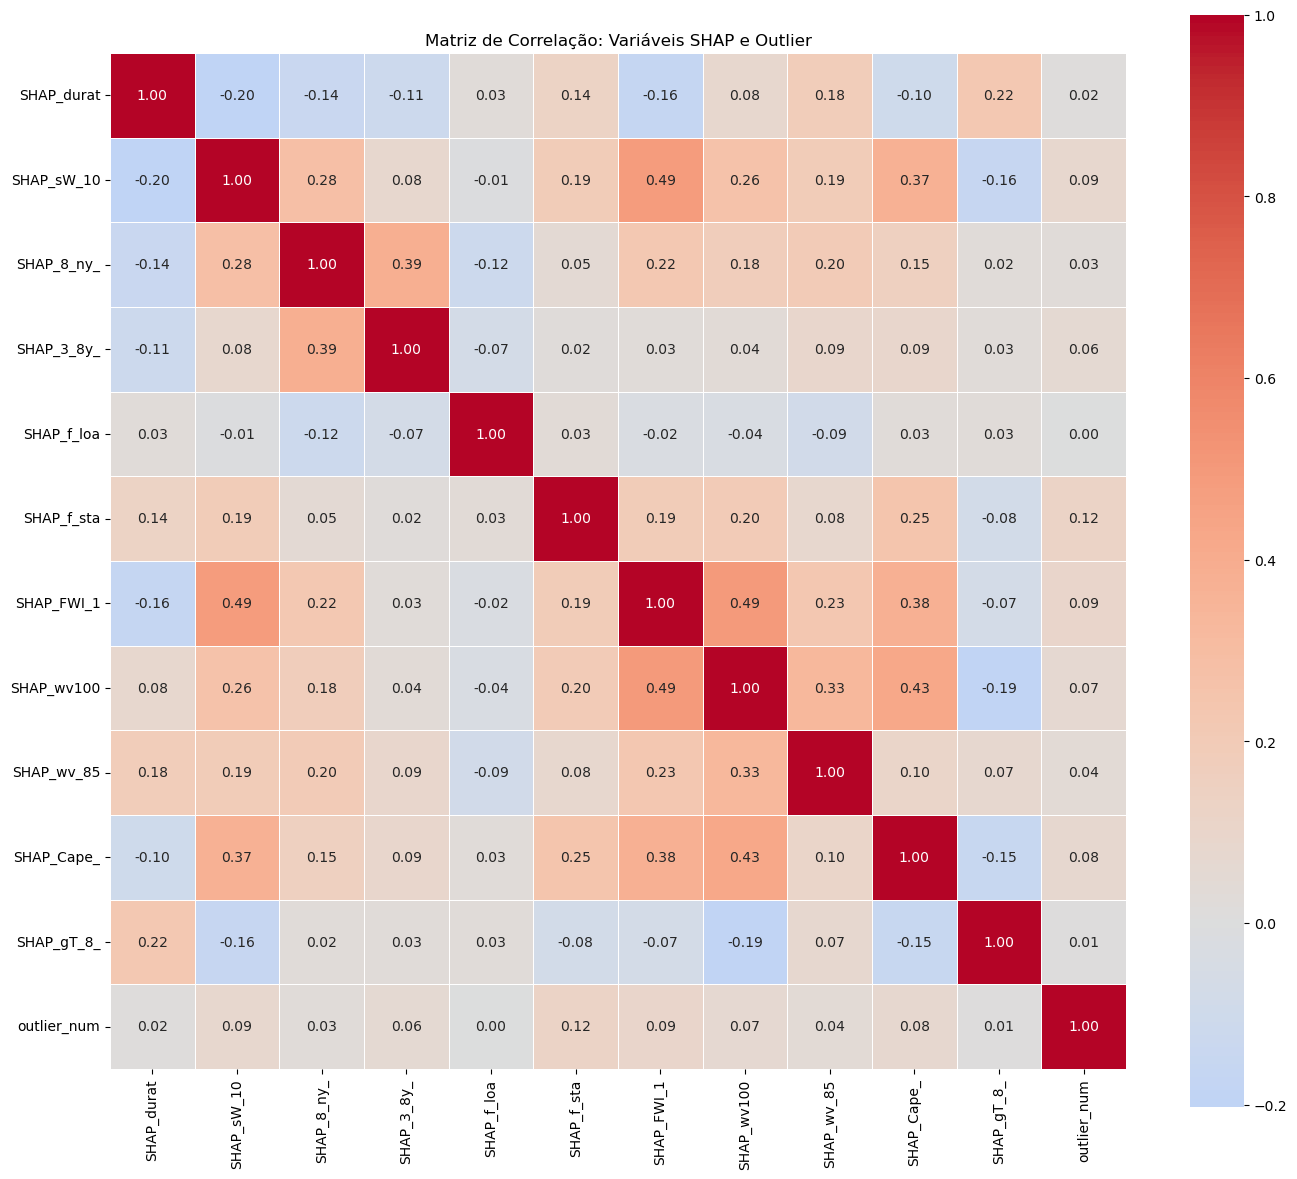

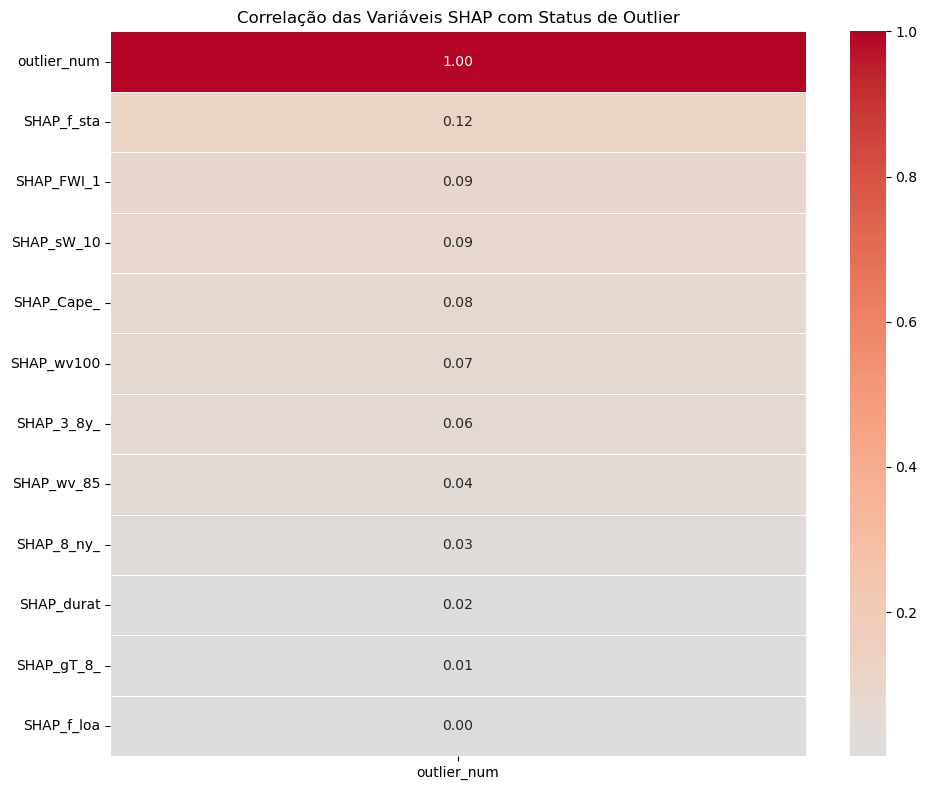

=== CORRELAÇÕES DAS VARIÁVEIS SHAP COM OUTLIER ===
(Valores positivos: maior SHAP → maior probabilidade de outlier)
(Valores negativos: maior SHAP → menor probabilidade de outlier)

SHAP_f_sta      :  0.124 (FRACA correlação positiva)
SHAP_FWI_1      :  0.095 (correlação insignificante)
SHAP_sW_10      :  0.086 (correlação insignificante)
SHAP_Cape_      :  0.076 (correlação insignificante)
SHAP_wv100      :  0.066 (correlação insignificante)
SHAP_3_8y_      :  0.060 (correlação insignificante)
SHAP_wv_85      :  0.043 (correlação insignificante)
SHAP_8_ny_      :  0.031 (correlação insignificante)
SHAP_durat      :  0.016 (correlação insignificante)
SHAP_gT_8_      :  0.007 (correlação insignificante)
SHAP_f_loa      :  0.001 (correlação insignificante)

=== ESTATÍSTICAS RESUMO ===
Total de variáveis SHAP analisadas: 11
Correlações fortes positivas (≥0.3): 0
Correlações fortes negativas (≤-0.3): 0
Correlações moderadas positivas (0.2-0.3): 0
Correlações moderadas negativas (-0.3-0.2):

In [20]:
# Selecionar variáveis SHAP para correlação
shap_corr_vars = [
    "SHAP_durat", "SHAP_sW_10", "SHAP_8_ny_", "SHAP_3_8y_", 
    "SHAP_f_loa", "SHAP_f_sta", "SHAP_FWI_1", "SHAP_wv100", 
    "SHAP_wv_85", "SHAP_Cape_", "SHAP_gT_8_"
]

# Filtrar apenas as colunas que existem no dataframe e são numéricas
shap_corr_vars = [var for var in shap_corr_vars if var in df.columns]
shap_corr_vars = [var for var in shap_corr_vars if pd.api.types.is_numeric_dtype(df[var])]

print(f"Variáveis SHAP numéricas encontradas: {len(shap_corr_vars)}")
print(shap_corr_vars)

# Criar matriz de correlação apenas com variáveis numéricas
df_shap_corr = df[shap_corr_vars].copy()

# Adicionar outlier como numérico
df_shap_corr['outlier_num'] = df['outlier'].map({1: 1, 0: 0})

# Verificar se há valores NaN
print(f"\nValores nulos por coluna:")
for col in df_shap_corr.columns:
    null_count = df_shap_corr[col].isnull().sum()
    if null_count > 0:
        print(f"  {col}: {null_count} nulos")

# Remover linhas com valores NaN para cálculo de correlação
df_shap_corr_clean = df_shap_corr.dropna()

print(f"\nShape original: {df_shap_corr.shape}")
print(f"Shape após remover NaN: {df_shap_corr_clean.shape}")

if len(df_shap_corr_clean) > 0:
    # Calcular matriz de correlação
    shap_correlation_matrix = df_shap_corr_clean.corr()
    
    # Plot da matriz de correlação completa das variáveis SHAP
    plt.figure(figsize=(14, 12))
    sns.heatmap(shap_correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', square=True, linewidths=0.5)
    plt.title('Matriz de Correlação: Variáveis SHAP e Outlier')
    plt.tight_layout()
    plt.show()
    
    # Plot focado apenas nas correlações com outlier
    plt.figure(figsize=(10, 8))
    outlier_correlations = shap_correlation_matrix[['outlier_num']].sort_values('outlier_num', ascending=False)
    sns.heatmap(outlier_correlations, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', linewidths=0.5)
    plt.title('Correlação das Variáveis SHAP com Status de Outlier')
    plt.tight_layout()
    plt.show()
    
    # Análise detalhada das correlações com outlier
    print("=== CORRELAÇÕES DAS VARIÁVEIS SHAP COM OUTLIER ===")
    print("(Valores positivos: maior SHAP → maior probabilidade de outlier)")
    print("(Valores negativos: maior SHAP → menor probabilidade de outlier)\n")
    
    outlier_corr_series = shap_correlation_matrix['outlier_num'].drop('outlier_num').sort_values(ascending=False)
    
    for var, corr in outlier_corr_series.items():
        if abs(corr) >= 0.1:
            strength = "FORTE" if abs(corr) >= 0.3 else "MODERADA" if abs(corr) >= 0.2 else "FRACA"
            direction = "positiva" if corr > 0 else "negativa"
            print(f"{var:15} : {corr:6.3f} ({strength} correlação {direction})")
        else:
            print(f"{var:15} : {corr:6.3f} (correlação insignificante)")
    
    # Estatísticas resumo
    print(f"\n=== ESTATÍSTICAS RESUMO ===")
    print(f"Total de variáveis SHAP analisadas: {len(outlier_corr_series)}")
    strong_pos = sum((outlier_corr_series >= 0.3) & (outlier_corr_series <= 1))
    strong_neg = sum((outlier_corr_series <= -0.3) & (outlier_corr_series >= -1))
    moderate_pos = sum((outlier_corr_series >= 0.2) & (outlier_corr_series < 0.3))
    moderate_neg = sum((outlier_corr_series <= -0.2) & (outlier_corr_series > -0.3))
    
    print(f"Correlações fortes positivas (≥0.3): {strong_pos}")
    print(f"Correlações fortes negativas (≤-0.3): {strong_neg}")
    print(f"Correlações moderadas positivas (0.2-0.3): {moderate_pos}")
    print(f"Correlações moderadas negativas (-0.3-0.2): {moderate_neg}")
    
    # Top 3 variáveis com maior correlação positiva e negativa
    print(f"\n=== TOP CORRELAÇÕES ===")
    top_positive = outlier_corr_series.head(3)
    top_negative = outlier_corr_series.tail(3)
    
    print("Maiores correlações POSITIVAS (maior SHAP → maior chance de outlier):")
    for var, corr in top_positive.items():
        print(f"  {var}: {corr:.3f}")
    
    print("\nMaiores correlações NEGATIVAS (maior SHAP → menor chance de outlier):")
    for var, corr in top_negative.items():
        print(f"  {var}: {corr:.3f}")
    
else:
    print("Não há dados suficientes após remover valores NaN para calcular correlações")

Variáveis normais numéricas encontradas: 11
['duration_p_', 'sW_100_av', '8_ny_fir_p', '3_8y_fir_p', 'f_load_av', 'f_start', 'FWI_12h_av', 'wv100_k_av', 'wv_850_av', 'Cape_av', 'gT_8_7_av']

Valores nulos por coluna:
  sW_100_av: 1657 nulos
  f_start: 1177 nulos
  FWI_12h_av: 1657 nulos
  wv100_k_av: 1657 nulos
  wv_850_av: 1657 nulos
  Cape_av: 1657 nulos
  gT_8_7_av: 1657 nulos

Shape original: (3355, 12)
Shape após remover NaN: (1698, 12)


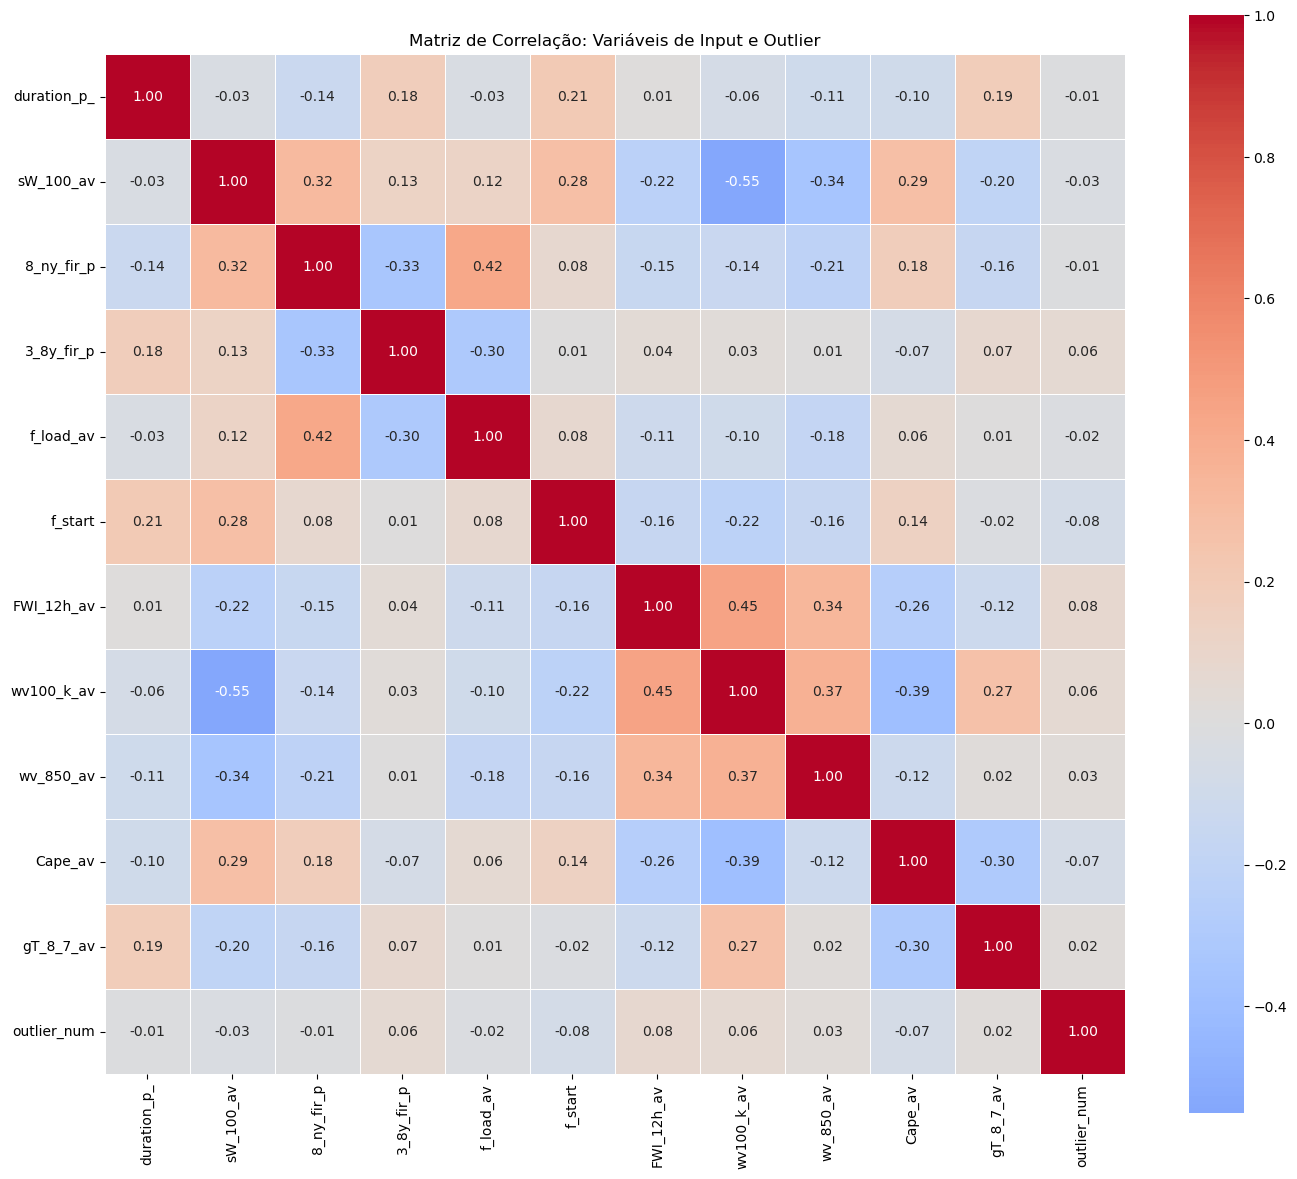

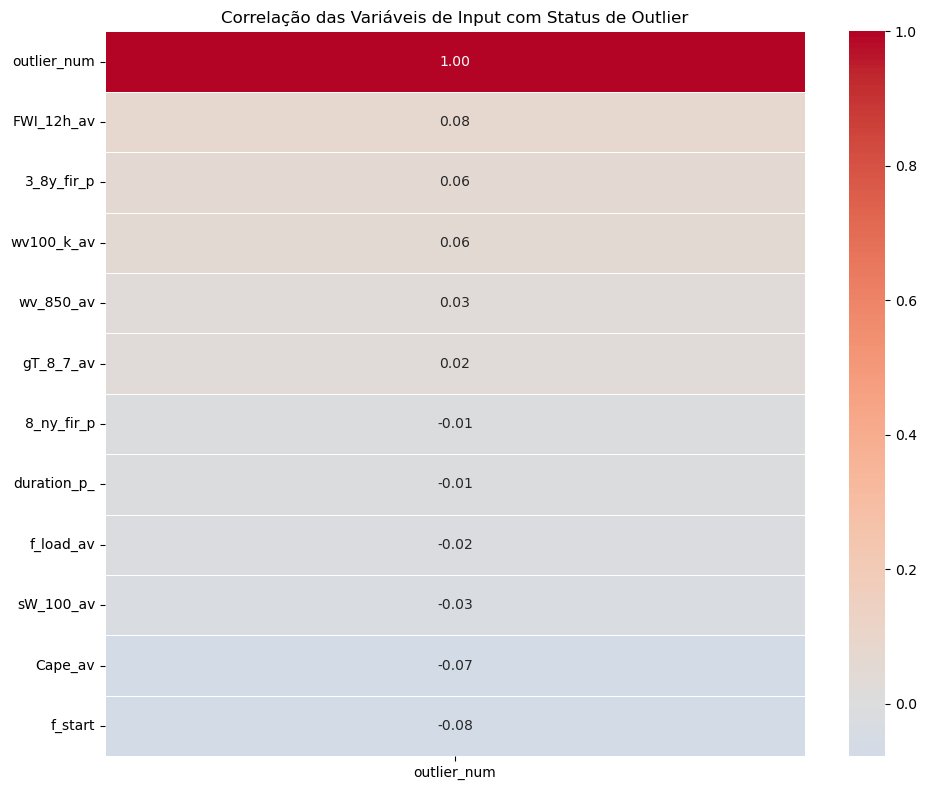

=== CORRELAÇÕES DAS VARIÁVEIS DE INPUT COM OUTLIER ===
(Valores positivos: maior valor da variável → maior probabilidade de outlier)
(Valores negativos: maior valor da variável → menor probabilidade de outlier)

FWI_12h_av      (SHAP_FWI_1)        :  0.077 (correlação insignificante)
3_8y_fir_p      (SHAP_3_8y_)        :  0.058 (correlação insignificante)
wv100_k_av      (SHAP_wv100)        :  0.056 (correlação insignificante)
wv_850_av       (SHAP_wv_85)        :  0.029 (correlação insignificante)
gT_8_7_av       (SHAP_gT_8_)        :  0.024 (correlação insignificante)
8_ny_fir_p      (SHAP_8_ny_)        : -0.007 (correlação insignificante)
duration_p_     (SHAP_durat)        : -0.011 (correlação insignificante)
f_load_av       (SHAP_f_loa)        : -0.022 (correlação insignificante)
sW_100_av       (SHAP_sW_10)        : -0.026 (correlação insignificante)
Cape_av         (SHAP_Cape_)        : -0.070 (correlação insignificante)
f_start         (SHAP_f_sta)        : -0.078 (correlação i

In [21]:
# Mapeamento das variáveis SHAP para as variáveis normais
shap_to_normal = {
    "SHAP_durat": "duration_p_",
    "SHAP_sW_10": "sW_100_av", 
    "SHAP_8_ny_": "8_ny_fir_p",
    "SHAP_3_8y_": "3_8y_fir_p",
    "SHAP_f_loa": "f_load_av",
    "SHAP_f_sta": "f_start",
    "SHAP_FWI_1": "FWI_12h_av",
    "SHAP_wv100": "wv100_k_av",
    "SHAP_wv_85": "wv_850_av",
    "SHAP_Cape_": "Cape_av",
    "SHAP_gT_8_": "gT_8_7_av"
}

# Selecionar variáveis normais para correlação
normal_corr_vars = list(shap_to_normal.values())

# Filtrar apenas as colunas que existem no dataframe e são numéricas
normal_corr_vars = [var for var in normal_corr_vars if var in df.columns]
normal_corr_vars = [var for var in normal_corr_vars if pd.api.types.is_numeric_dtype(df[var])]

print(f"Variáveis normais numéricas encontradas: {len(normal_corr_vars)}")
print(normal_corr_vars)

# Criar matriz de correlação apenas com variáveis numéricas
df_normal_corr = df[normal_corr_vars].copy()

# Adicionar outlier como numérico
df_normal_corr['outlier_num'] = df['outlier'].map({1: 1, 0: 0})

# Verificar se há valores NaN
print(f"\nValores nulos por coluna:")
for col in df_normal_corr.columns:
    null_count = df_normal_corr[col].isnull().sum()
    if null_count > 0:
        print(f"  {col}: {null_count} nulos")

# Remover linhas com valores NaN para cálculo de correlação
df_normal_corr_clean = df_normal_corr.dropna()

print(f"\nShape original: {df_normal_corr.shape}")
print(f"Shape após remover NaN: {df_normal_corr_clean.shape}")

if len(df_normal_corr_clean) > 0:
    # Calcular matriz de correlação
    normal_correlation_matrix = df_normal_corr_clean.corr()
    
    # Plot da matriz de correlação completa das variáveis normais
    plt.figure(figsize=(14, 12))
    sns.heatmap(normal_correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', square=True, linewidths=0.5)
    plt.title('Matriz de Correlação: Variáveis de Input e Outlier')
    plt.tight_layout()
    plt.show()
    
    # Plot focado apenas nas correlações com outlier
    plt.figure(figsize=(10, 8))
    outlier_correlations = normal_correlation_matrix[['outlier_num']].sort_values('outlier_num', ascending=False)
    sns.heatmap(outlier_correlations, annot=True, cmap='coolwarm', center=0, 
                fmt='.2f', linewidths=0.5)
    plt.title('Correlação das Variáveis de Input com Status de Outlier')
    plt.tight_layout()
    plt.show()
    
    # Análise detalhada das correlações com outlier
    print("=== CORRELAÇÕES DAS VARIÁVEIS DE INPUT COM OUTLIER ===")
    print("(Valores positivos: maior valor da variável → maior probabilidade de outlier)")
    print("(Valores negativos: maior valor da variável → menor probabilidade de outlier)\n")
    
    outlier_corr_series = normal_correlation_matrix['outlier_num'].drop('outlier_num').sort_values(ascending=False)
    
    for var, corr in outlier_corr_series.items():
        # Encontrar a variável SHAP correspondente
        shap_var = [k for k, v in shap_to_normal.items() if v == var]
        shap_label = f" ({shap_var[0]})" if shap_var else ""
        
        if abs(corr) >= 0.1:
            strength = "FORTE" if abs(corr) >= 0.3 else "MODERADA" if abs(corr) >= 0.2 else "FRACA"
            direction = "positiva" if corr > 0 else "negativa"
            print(f"{var:15}{shap_label:20} : {corr:6.3f} ({strength} correlação {direction})")
        else:
            print(f"{var:15}{shap_label:20} : {corr:6.3f} (correlação insignificante)")
    
    # Estatísticas resumo
    print(f"\n=== ESTATÍSTICAS RESUMO ===")
    print(f"Total de variáveis de input analisadas: {len(outlier_corr_series)}")
    strong_pos = sum((outlier_corr_series >= 0.3) & (outlier_corr_series <= 1))
    strong_neg = sum((outlier_corr_series <= -0.3) & (outlier_corr_series >= -1))
    moderate_pos = sum((outlier_corr_series >= 0.2) & (outlier_corr_series < 0.3))
    moderate_neg = sum((outlier_corr_series <= -0.2) & (outlier_corr_series > -0.3))
    
    print(f"Correlações fortes positivas (≥0.3): {strong_pos}")
    print(f"Correlações fortes negativas (≤-0.3): {strong_neg}")
    print(f"Correlações moderadas positivas (0.2-0.3): {moderate_pos}")
    print(f"Correlações moderadas negativas (-0.3-0.2): {moderate_neg}")
    
    # Top 3 variáveis com maior correlação positiva e negativa
    print(f"\n=== TOP CORRELAÇÕES ===")
    top_positive = outlier_corr_series.head(3)
    top_negative = outlier_corr_series.tail(3)
    
    print("Maiores correlações POSITIVAS (maior valor → maior chance de outlier):")
    for var, corr in top_positive.items():
        shap_var = [k for k, v in shap_to_normal.items() if v == var]
        shap_label = f" ({shap_var[0]})" if shap_var else ""
        print(f"  {var}{shap_label}: {corr:.3f}")
    
    print("\nMaiores correlações NEGATIVAS (maior valor → menor chance de outlier):")
    for var, corr in top_negative.items():
        shap_var = [k for k, v in shap_to_normal.items() if v == var]
        shap_label = f" ({shap_var[0]})" if shap_var else ""
        print(f"  {var}{shap_label}: {corr:.3f}")
    
    # Interpretação prática
    print(f"\n=== INTERPRETAÇÃO PRÁTICA ===")
    if len(top_positive) > 0:
        print("Variáveis onde valores MAIS ALTOS aumentam a probabilidade de ser outlier:")
        for var in top_positive.index:
            print(f"  • {var}")
    
    if len(top_negative) > 0:
        print("\nVariáveis onde valores MAIS ALTOS diminuem a probabilidade de ser outlier:")
        for var in top_negative.index:
            print(f"  • {var}")
    
else:
    print("Não há dados suficientes após remover valores NaN para calcular correlações")

Scatter Plots: Variáveis SHAP vs Erro % (Apenas Outliers)
Total de outliers: 686
Variáveis SHAP encontradas: 11


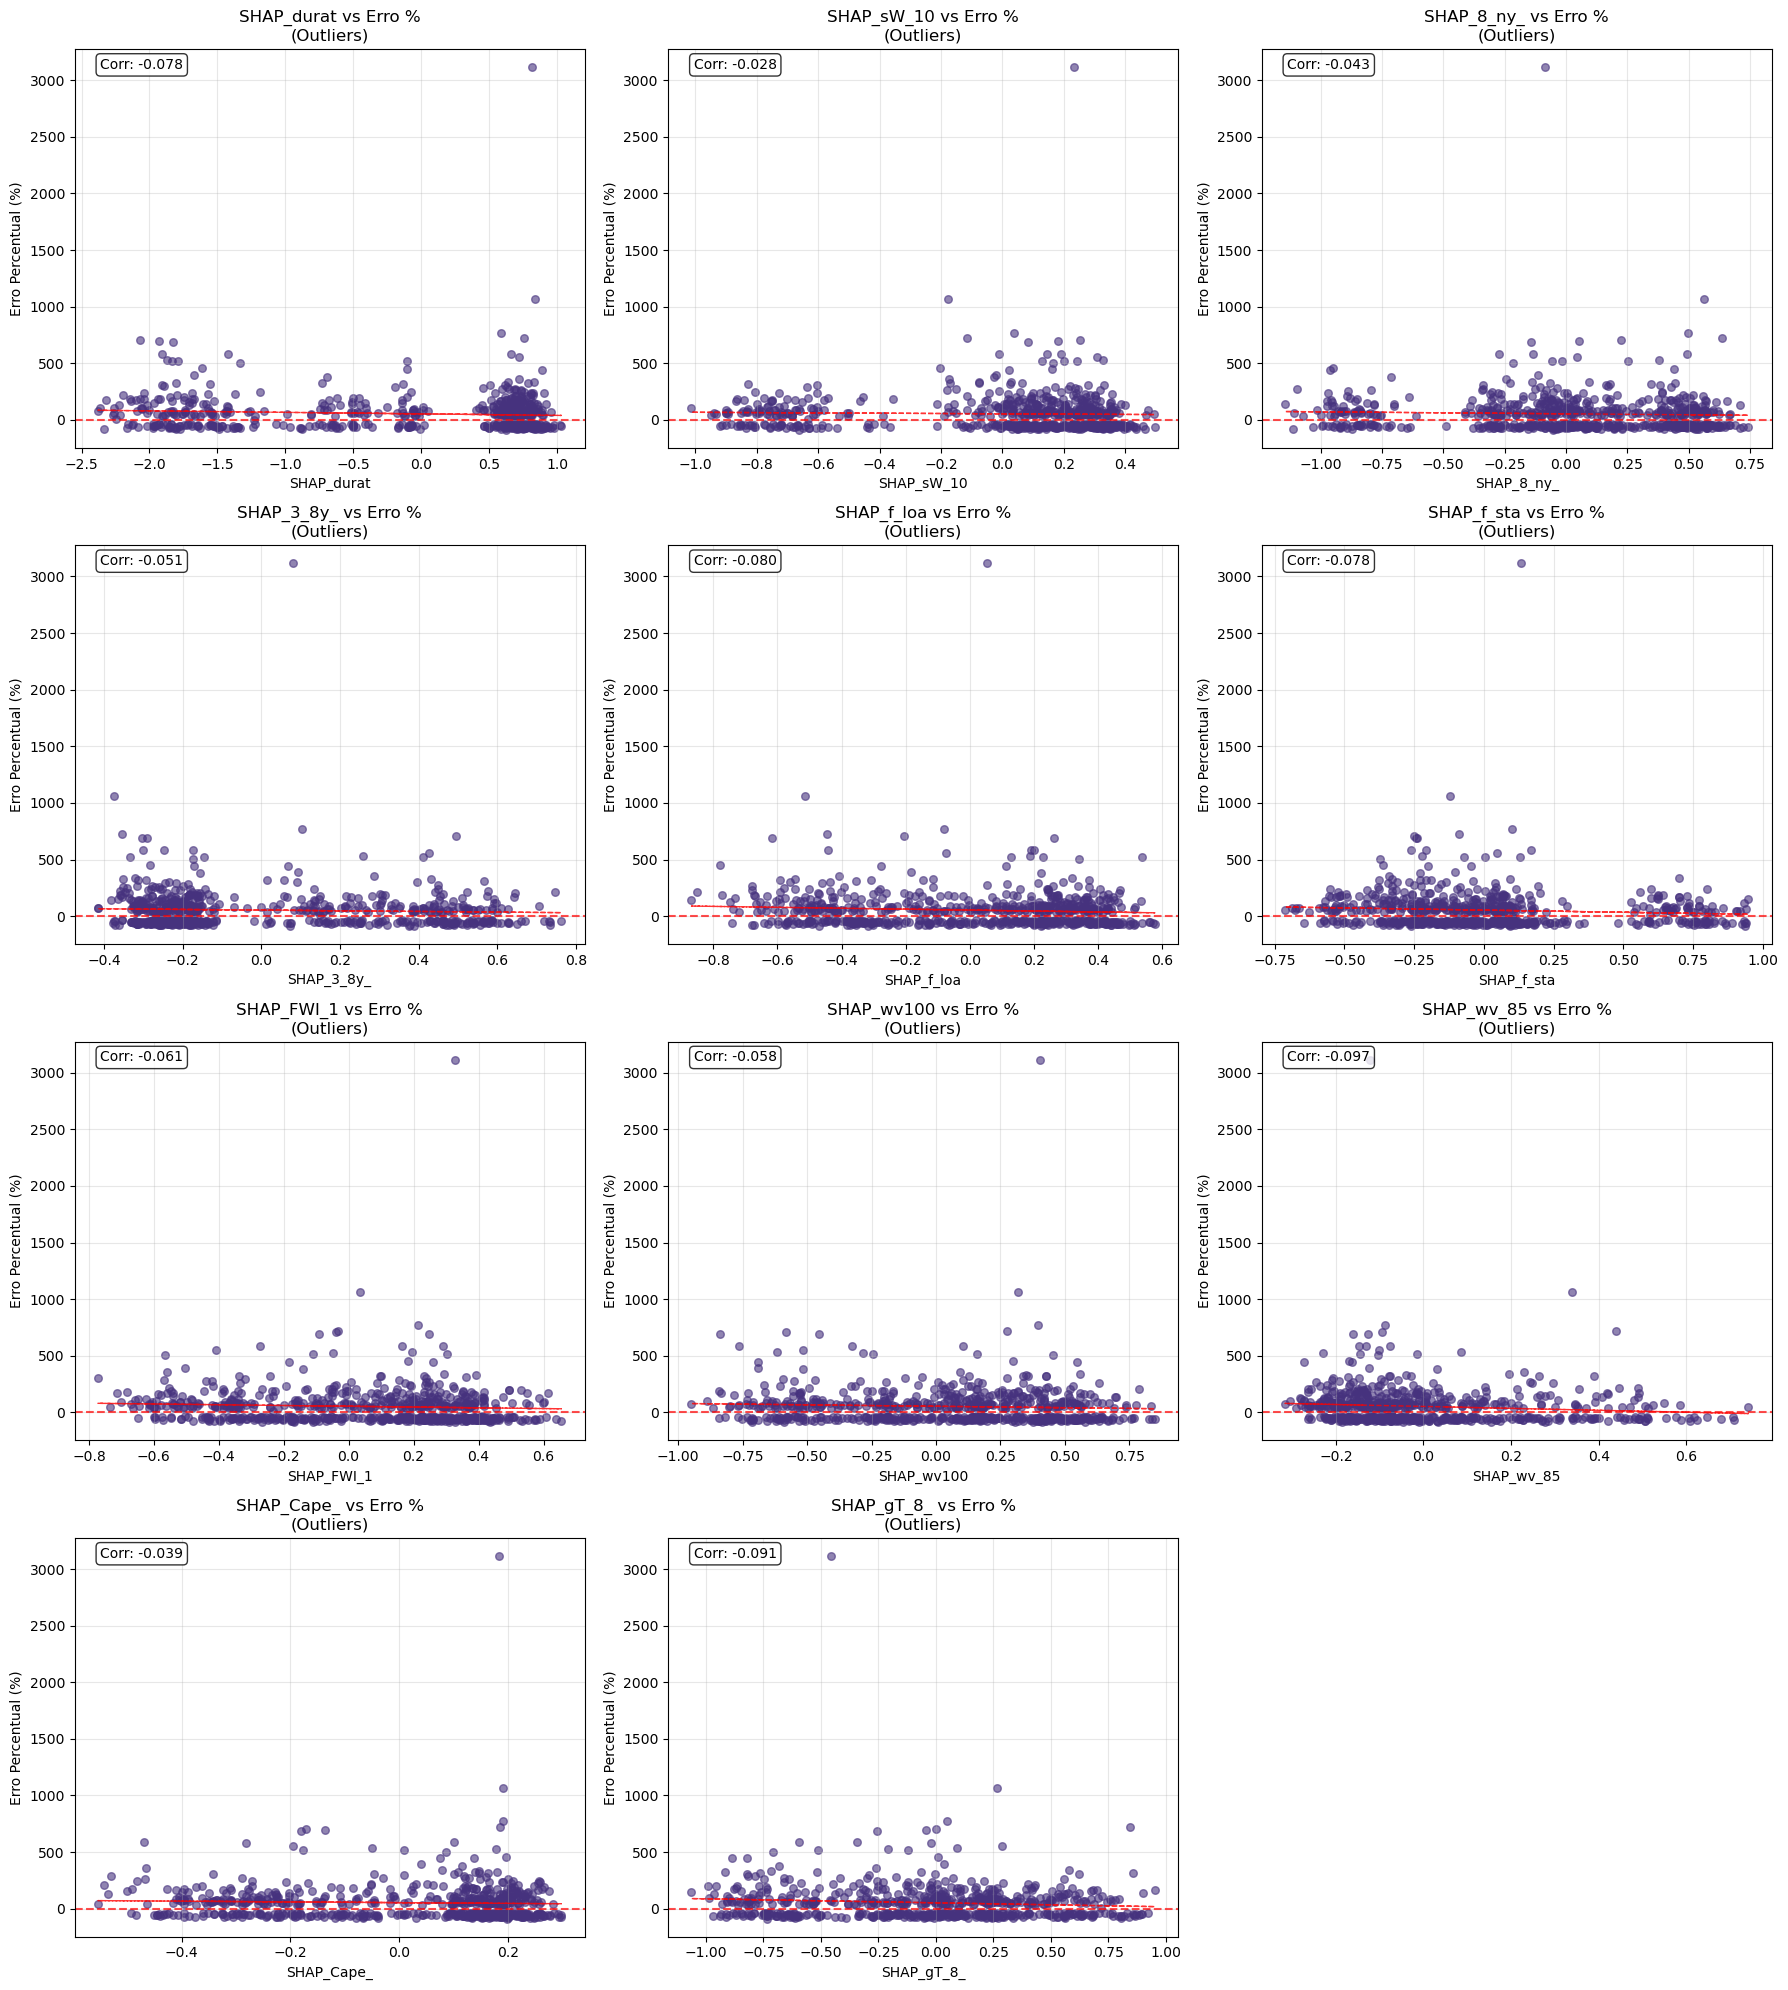


=== CORRELAÇÕES SHAP vs ERRO % (APENAS OUTLIERS) ===

Top 5 correlações POSITIVAS (maior SHAP → maior erro):
  SHAP_sW_10: -0.028 (n=686)
  SHAP_Cape_: -0.039 (n=686)
  SHAP_8_ny_: -0.043 (n=686)
  SHAP_3_8y_: -0.051 (n=686)
  SHAP_wv100: -0.058 (n=686)

Top 5 correlações NEGATIVAS (maior SHAP → menor erro):
  SHAP_durat: -0.078 (n=686)
  SHAP_f_sta: -0.078 (n=686)
  SHAP_f_loa: -0.080 (n=686)
  SHAP_gT_8_: -0.091 (n=686)
  SHAP_wv_85: -0.097 (n=686)


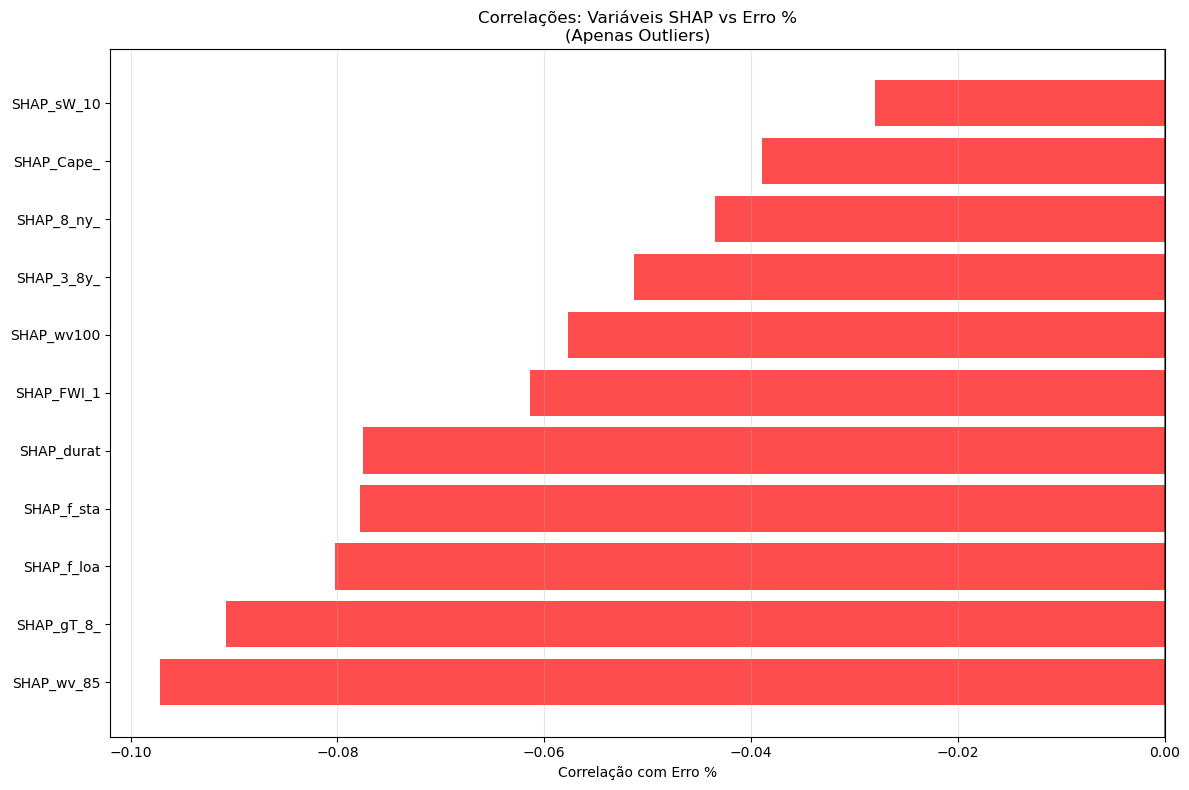


=== ESTATÍSTICAS RESUMO ===
Total de variáveis SHAP analisadas: 11
Média absoluta das correlações: 0.064
Variáveis com correlação > 0.3: 0
Variáveis com correlação < -0.3: 0


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurações de estilo
plt.style.use('default')
sns.set_palette("viridis")

print("Scatter Plots: Variáveis SHAP vs Erro % (Apenas Outliers)")

# Filtrar apenas outliers
outliers_df = df[df['outlier'] == 1].copy()

# Garantir que as colunas são numéricas
outliers_df['PctErr'] = pd.to_numeric(outliers_df['PctErr'], errors='coerce')

# Lista de variáveis SHAP
shap_vars = [col for col in df.columns if 'SHAP' in col and col in df.columns]
shap_vars = [var for var in shap_vars if pd.api.types.is_numeric_dtype(df[var])]

print(f"Total de outliers: {len(outliers_df)}")
print(f"Variáveis SHAP encontradas: {len(shap_vars)}")

if len(outliers_df) > 0 and len(shap_vars) > 0:
    # Criar subplots - 4x3 grid
    n_cols = 3
    n_rows = (len(shap_vars) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    
    if n_rows > 1:
        axes = axes.ravel()
    else:
        axes = [axes] if n_cols == 1 else axes
    
    for i, shap_var in enumerate(shap_vars):
        if i < len(axes):
            # Garantir que a variável SHAP é numérica
            outliers_df[shap_var] = pd.to_numeric(outliers_df[shap_var], errors='coerce')
            
            # Remover NaN para este par específico
            plot_data = outliers_df[[shap_var, 'PctErr']].dropna()
            
            if len(plot_data) > 0:
                # Scatter plot
                scatter = axes[i].scatter(plot_data[shap_var], plot_data['PctErr'], 
                                         alpha=0.6, s=30)
                axes[i].set_xlabel(shap_var)
                axes[i].set_ylabel('Erro Percentual (%)')
                axes[i].set_title(f'{shap_var} vs Erro %\n(Outliers)')
                axes[i].axhline(y=0, color='red', linestyle='--', alpha=0.7)
                axes[i].grid(True, alpha=0.3)
                
                # Adicionar linha de tendência
                if len(plot_data) > 1:
                    z = np.polyfit(plot_data[shap_var], plot_data['PctErr'], 1)
                    p = np.poly1d(z)
                    axes[i].plot(plot_data[shap_var], p(plot_data[shap_var]), 
                                "r--", alpha=0.8, linewidth=1)
                    
                    # Calcular correlação
                    corr = plot_data[shap_var].corr(plot_data['PctErr'])
                    axes[i].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                                transform=axes[i].transAxes, fontsize=10,
                                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
            else:
                axes[i].text(0.5, 0.5, 'Sem dados', ha='center', va='center', 
                           transform=axes[i].transAxes)
                axes[i].set_title(f'{shap_var} vs Erro %')
    
    # Ocultar eixos extras
    for i in range(len(shap_vars), len(axes)):
        try:
            axes[i].set_visible(False)
        except:
            pass
    
    plt.tight_layout()
    plt.show()
    
    # Análise de correlações
    print("\n=== CORRELAÇÕES SHAP vs ERRO % (APENAS OUTLIERS) ===")
    correlations = []
    
    for shap_var in shap_vars:
        outliers_df[shap_var] = pd.to_numeric(outliers_df[shap_var], errors='coerce')
        plot_data = outliers_df[[shap_var, 'PctErr']].dropna()
        
        if len(plot_data) > 1:
            corr = plot_data[shap_var].corr(plot_data['PctErr'])
            correlations.append({
                'Variável': shap_var,
                'Correlação': corr,
                'n': len(plot_data)
            })
    
    if correlations:
        corr_df = pd.DataFrame(correlations)
        corr_df = corr_df.sort_values('Correlação', ascending=False)
        
        print("\nTop 5 correlações POSITIVAS (maior SHAP → maior erro):")
        for _, row in corr_df.head(5).iterrows():
            print(f"  {row['Variável']}: {row['Correlação']:.3f} (n={row['n']})")
        
        print("\nTop 5 correlações NEGATIVAS (maior SHAP → menor erro):")
        for _, row in corr_df.tail(5).iterrows():
            print(f"  {row['Variável']}: {row['Correlação']:.3f} (n={row['n']})")
        
        # Plot de resumo das correlações
        plt.figure(figsize=(12, 8))
        corr_df_sorted = corr_df.sort_values('Correlação')
        colors = ['red' if x < 0 else 'blue' for x in corr_df_sorted['Correlação']]
        
        plt.barh(corr_df_sorted['Variável'], corr_df_sorted['Correlação'], color=colors, alpha=0.7)
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
        plt.xlabel('Correlação com Erro %')
        plt.title('Correlações: Variáveis SHAP vs Erro %\n(Apenas Outliers)')
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
        
        # Estatísticas resumo
        print(f"\n=== ESTATÍSTICAS RESUMO ===")
        print(f"Total de variáveis SHAP analisadas: {len(correlations)}")
        print(f"Média absoluta das correlações: {corr_df['Correlação'].abs().mean():.3f}")
        print(f"Variáveis com correlação > 0.3: {len(corr_df[corr_df['Correlação'] > 0.3])}")
        print(f"Variáveis com correlação < -0.3: {len(corr_df[corr_df['Correlação'] < -0.3])}")
        
else:
    print("Não há outliers ou variáveis SHAP suficientes para plotar")

Scatter Plots: Variáveis de Input vs Erro % (Apenas Outliers)
Total de outliers: 686
Variáveis de input encontradas: 11
['duration_p_', 'sW_100_av', '8_ny_fir_p', '3_8y_fir_p', 'f_load_av', 'f_start', 'FWI_12h_av', 'wv100_k_av', 'wv_850_av', 'Cape_av', 'gT_8_7_av']


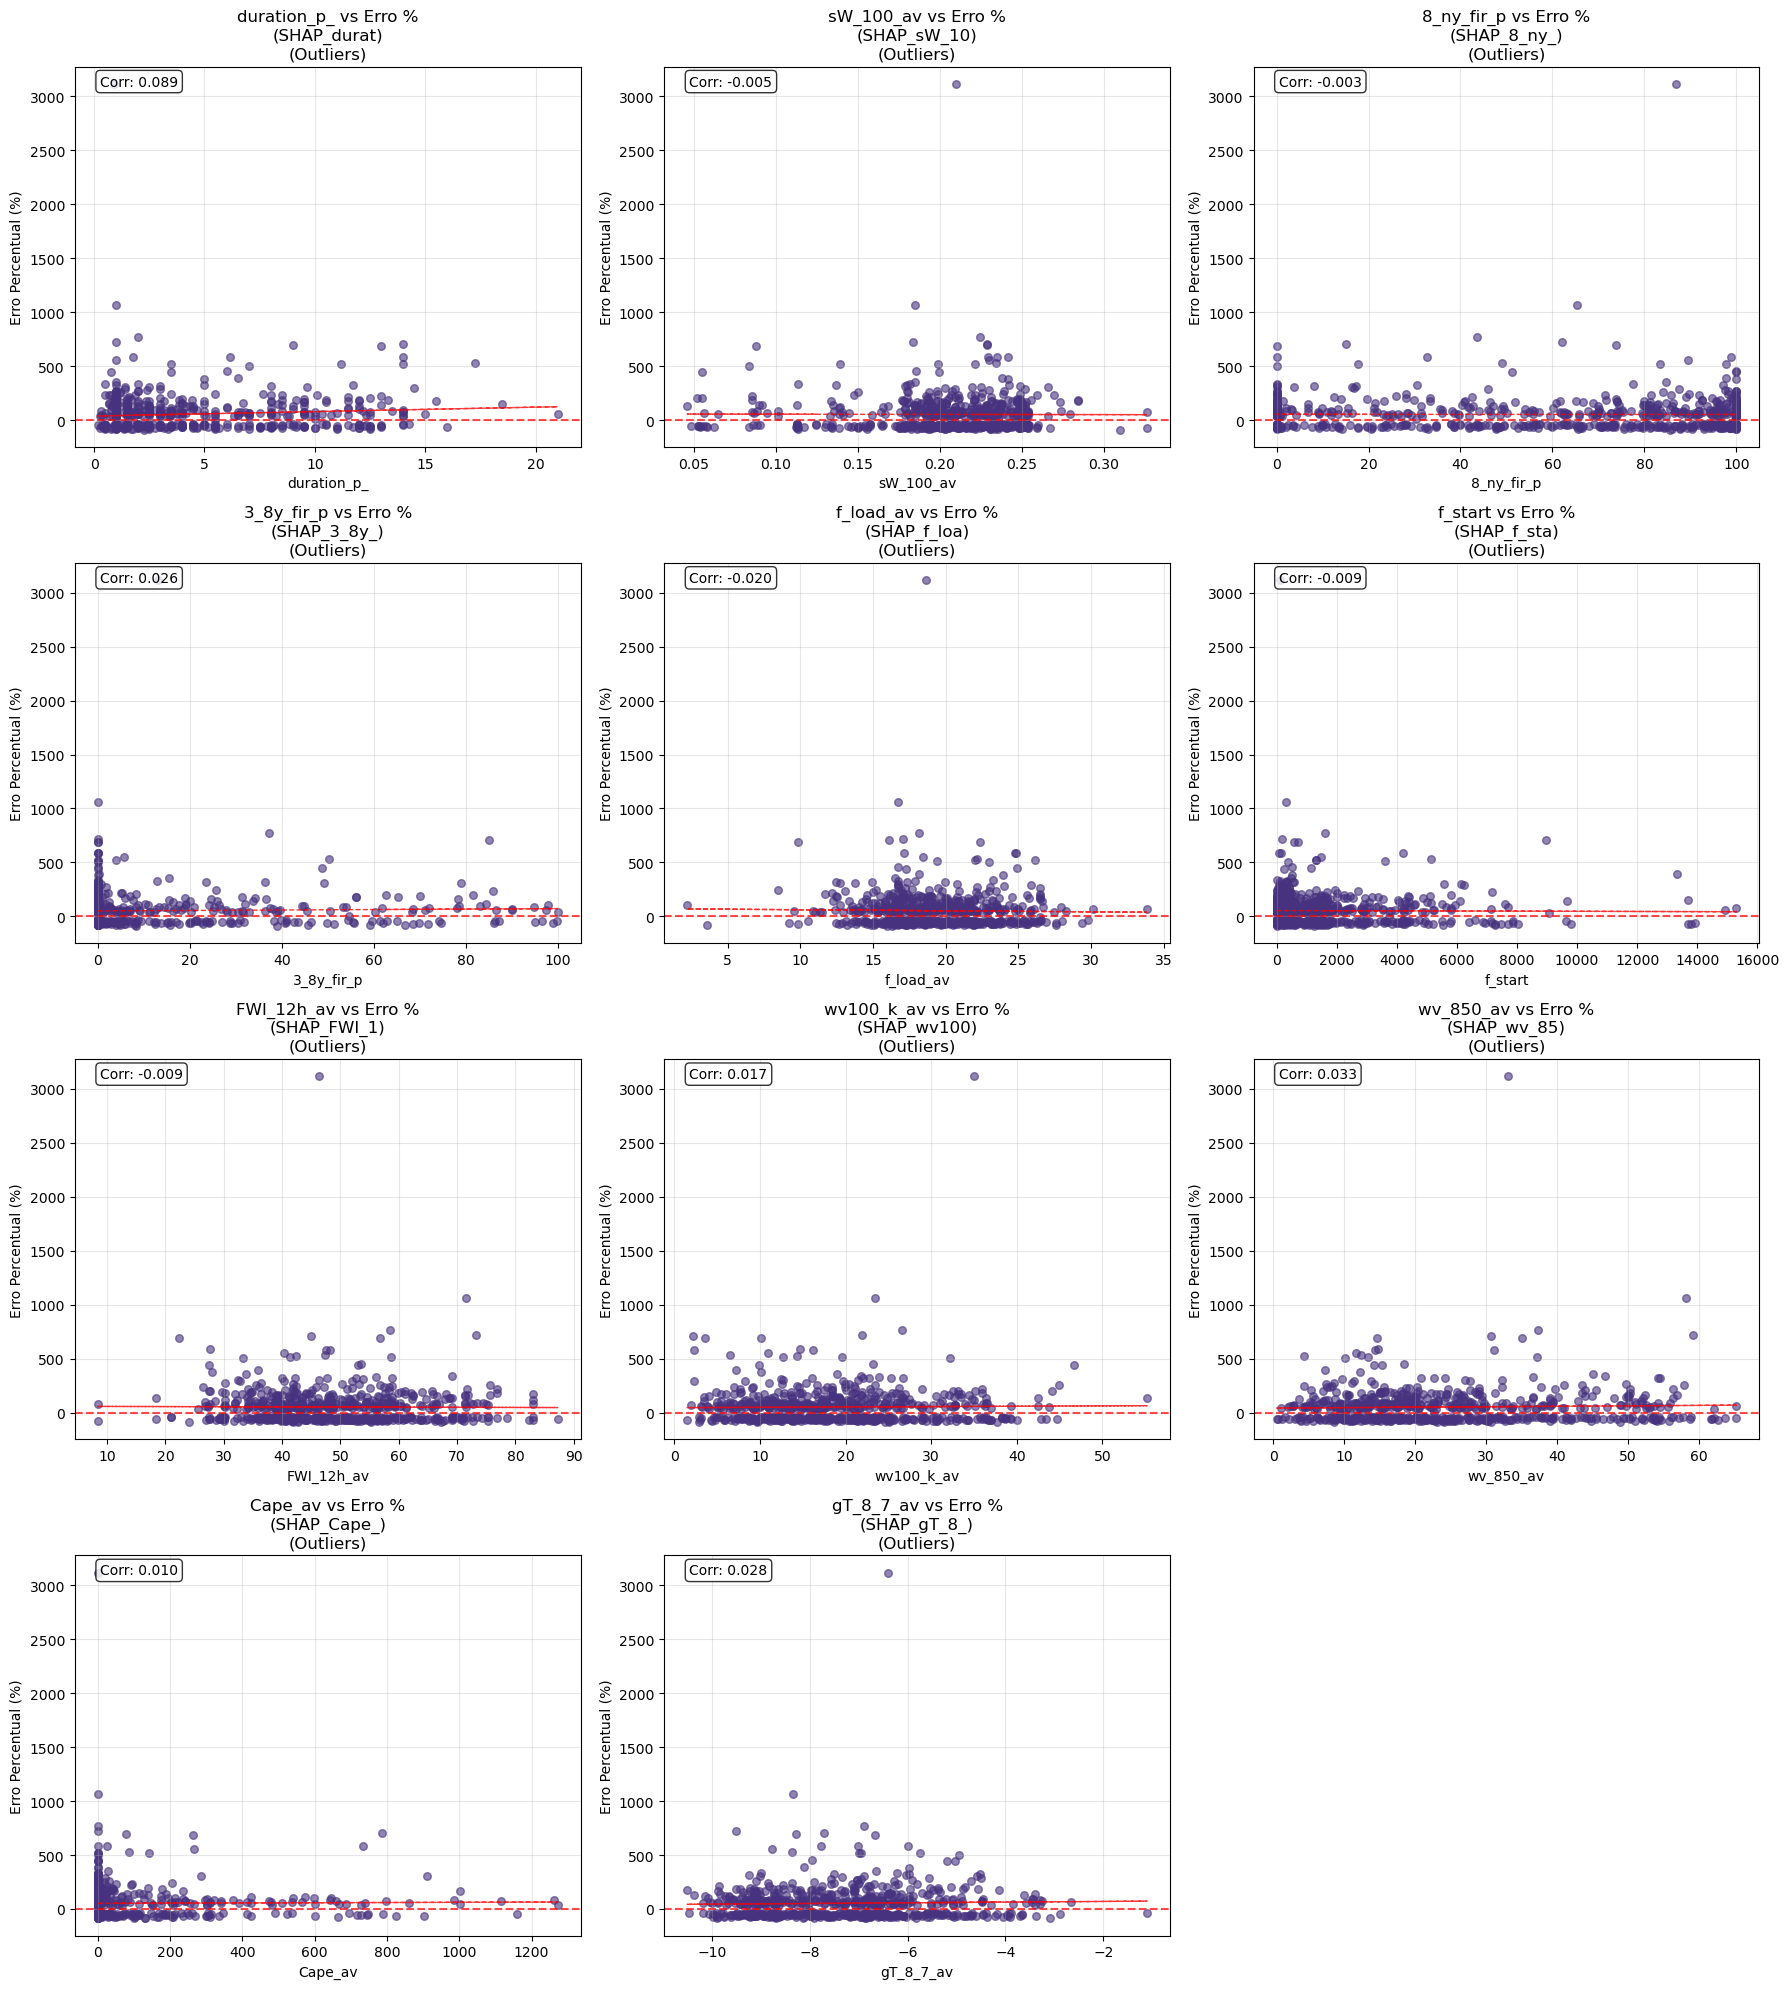


=== CORRELAÇÕES VARIÁVEIS DE INPUT vs ERRO % (APENAS OUTLIERS) ===

Top 5 correlações POSITIVAS (maior valor da variável → maior erro):
  duration_p_ (SHAP_durat): 0.089 (n=686)
  wv_850_av (SHAP_wv_85): 0.033 (n=685)
  gT_8_7_av (SHAP_gT_8_): 0.028 (n=685)
  3_8y_fir_p (SHAP_3_8y_): 0.026 (n=686)
  wv100_k_av (SHAP_wv100): 0.017 (n=685)

Top 5 correlações NEGATIVAS (maior valor da variável → menor erro):
  8_ny_fir_p (SHAP_8_ny_): -0.003 (n=686)
  sW_100_av (SHAP_sW_10): -0.005 (n=685)
  f_start (SHAP_f_sta): -0.009 (n=686)
  FWI_12h_av (SHAP_FWI_1): -0.009 (n=685)
  f_load_av (SHAP_f_loa): -0.020 (n=686)


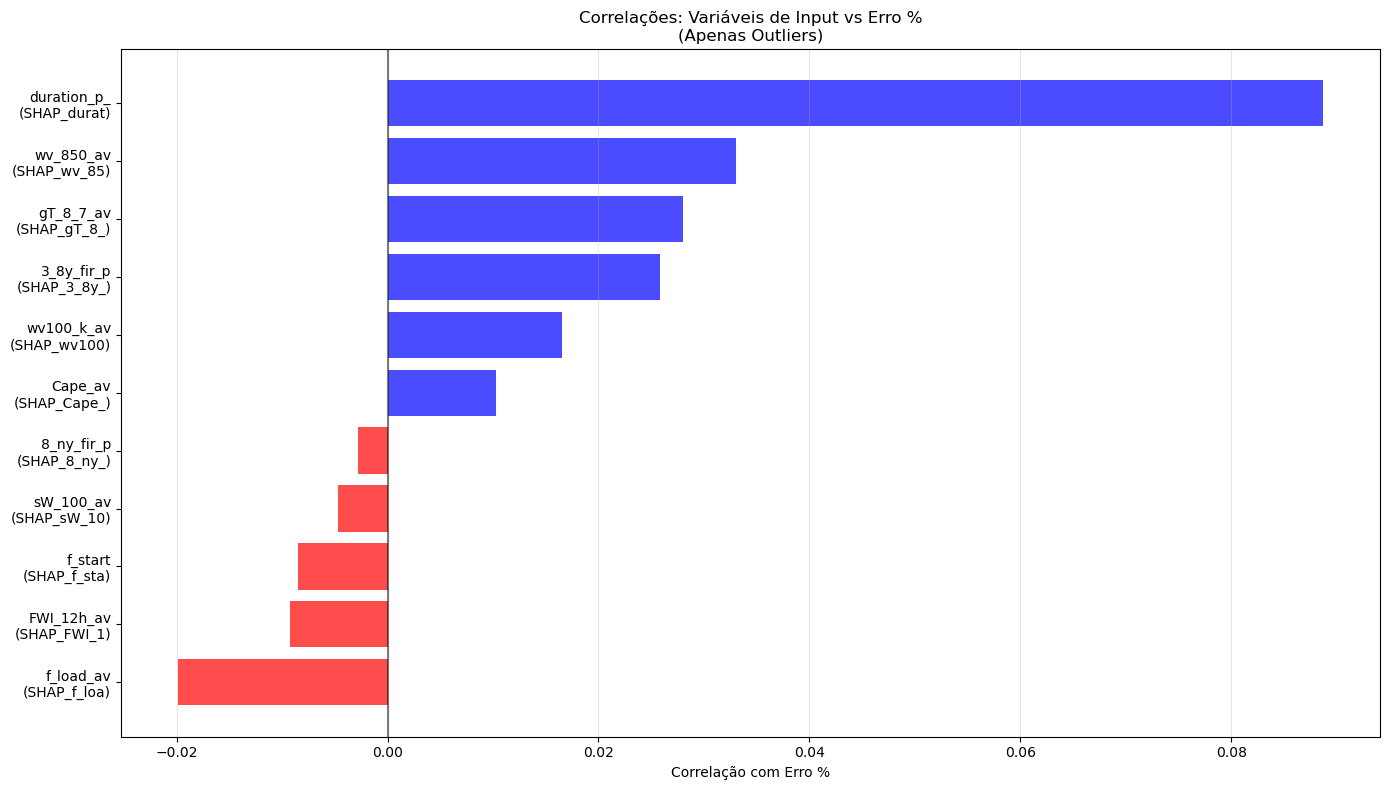


=== ESTATÍSTICAS RESUMO ===
Total de variáveis de input analisadas: 11
Média absoluta das correlações: 0.023
Variáveis com correlação > 0.3: 0
Variáveis com correlação < -0.3: 0

=== INTERPRETAÇÃO PRÁTICA ===


In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Configurações de estilo
plt.style.use('default')
sns.set_palette("viridis")

# Mapeamento das variáveis SHAP para as variáveis normais
shap_to_normal = {
    "SHAP_durat": "duration_p_",
    "SHAP_sW_10": "sW_100_av", 
    "SHAP_8_ny_": "8_ny_fir_p",
    "SHAP_3_8y_": "3_8y_fir_p",
    "SHAP_f_loa": "f_load_av",
    "SHAP_f_sta": "f_start",
    "SHAP_FWI_1": "FWI_12h_av",
    "SHAP_wv100": "wv100_k_av",
    "SHAP_wv_85": "wv_850_av",
    "SHAP_Cape_": "Cape_av",
    "SHAP_gT_8_": "gT_8_7_av"
}

print("Scatter Plots: Variáveis de Input vs Erro % (Apenas Outliers)")

# Filtrar apenas outliers
outliers_df = df[df['outlier'] == 1].copy()

# Garantir que as colunas são numéricas
outliers_df['PctErr'] = pd.to_numeric(outliers_df['PctErr'], errors='coerce')

# Lista de variáveis normais correspondentes
normal_vars = list(shap_to_normal.values())

# Filtrar apenas as variáveis que existem no dataframe e são numéricas
normal_vars = [var for var in normal_vars if var in df.columns]
normal_vars = [var for var in normal_vars if pd.api.types.is_numeric_dtype(df[var])]

print(f"Total de outliers: {len(outliers_df)}")
print(f"Variáveis de input encontradas: {len(normal_vars)}")
print(normal_vars)

if len(outliers_df) > 0 and len(normal_vars) > 0:
    # Criar subplots - 4x3 grid
    n_cols = 3
    n_rows = (len(normal_vars) + n_cols - 1) // n_cols
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 5*n_rows))
    
    if n_rows > 1:
        axes = axes.ravel()
    else:
        axes = [axes] if n_cols == 1 else axes
    
    for i, normal_var in enumerate(normal_vars):
        if i < len(axes):
            # Garantir que a variável normal é numérica
            outliers_df[normal_var] = pd.to_numeric(outliers_df[normal_var], errors='coerce')
            
            # Remover NaN para este par específico
            plot_data = outliers_df[[normal_var, 'PctErr']].dropna()
            
            if len(plot_data) > 0:
                # Scatter plot
                scatter = axes[i].scatter(plot_data[normal_var], plot_data['PctErr'], 
                                         alpha=0.6, s=30)
                
                # Encontrar a variável SHAP correspondente para o título
                shap_var = [k for k, v in shap_to_normal.items() if v == normal_var]
                shap_label = f"\n({shap_var[0]})" if shap_var else ""
                
                axes[i].set_xlabel(normal_var)
                axes[i].set_ylabel('Erro Percentual (%)')
                axes[i].set_title(f'{normal_var} vs Erro %{shap_label}\n(Outliers)')
                axes[i].axhline(y=0, color='red', linestyle='--', alpha=0.7)
                axes[i].grid(True, alpha=0.3)
                
                # Adicionar linha de tendência
                if len(plot_data) > 1:
                    z = np.polyfit(plot_data[normal_var], plot_data['PctErr'], 1)
                    p = np.poly1d(z)
                    axes[i].plot(plot_data[normal_var], p(plot_data[normal_var]), 
                                "r--", alpha=0.8, linewidth=1)
                    
                    # Calcular correlação
                    corr = plot_data[normal_var].corr(plot_data['PctErr'])
                    axes[i].text(0.05, 0.95, f'Corr: {corr:.3f}', 
                                transform=axes[i].transAxes, fontsize=10,
                                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8))
            else:
                axes[i].text(0.5, 0.5, 'Sem dados', ha='center', va='center', 
                           transform=axes[i].transAxes)
                axes[i].set_title(f'{normal_var} vs Erro %')
    
    # Ocultar eixos extras
    for i in range(len(normal_vars), len(axes)):
        try:
            axes[i].set_visible(False)
        except:
            pass
    
    plt.tight_layout()
    plt.show()
    
    # Análise de correlações
    print("\n=== CORRELAÇÕES VARIÁVEIS DE INPUT vs ERRO % (APENAS OUTLIERS) ===")
    correlations = []
    
    for normal_var in normal_vars:
        outliers_df[normal_var] = pd.to_numeric(outliers_df[normal_var], errors='coerce')
        plot_data = outliers_df[[normal_var, 'PctErr']].dropna()
        
        if len(plot_data) > 1:
            corr = plot_data[normal_var].corr(plot_data['PctErr'])
            
            # Encontrar SHAP correspondente
            shap_var = [k for k, v in shap_to_normal.items() if v == normal_var]
            shap_name = shap_var[0] if shap_var else "N/A"
            
            correlations.append({
                'Variável_Input': normal_var,
                'SHAP_Correspondente': shap_name,
                'Correlação': corr,
                'n': len(plot_data)
            })
    
    if correlations:
        corr_df = pd.DataFrame(correlations)
        corr_df = corr_df.sort_values('Correlação', ascending=False)
        
        print("\nTop 5 correlações POSITIVAS (maior valor da variável → maior erro):")
        for _, row in corr_df.head(5).iterrows():
            print(f"  {row['Variável_Input']} ({row['SHAP_Correspondente']}): {row['Correlação']:.3f} (n={row['n']})")
        
        print("\nTop 5 correlações NEGATIVAS (maior valor da variável → menor erro):")
        for _, row in corr_df.tail(5).iterrows():
            print(f"  {row['Variável_Input']} ({row['SHAP_Correspondente']}): {row['Correlação']:.3f} (n={row['n']})")
        
        # Plot de resumo das correlações
        plt.figure(figsize=(14, 8))
        corr_df_sorted = corr_df.sort_values('Correlação')
        colors = ['red' if x < 0 else 'blue' for x in corr_df_sorted['Correlação']]
        
        # Criar labels com ambas as variáveis
        labels = [f"{row['Variável_Input']}\n({row['SHAP_Correspondente']})" 
                 for _, row in corr_df_sorted.iterrows()]
        
        plt.barh(labels, corr_df_sorted['Correlação'], color=colors, alpha=0.7)
        plt.axvline(x=0, color='black', linestyle='-', alpha=0.5)
        plt.xlabel('Correlação com Erro %')
        plt.title('Correlações: Variáveis de Input vs Erro %\n(Apenas Outliers)')
        plt.grid(True, alpha=0.3, axis='x')
        plt.tight_layout()
        plt.show()
        
        # Estatísticas resumo
        print(f"\n=== ESTATÍSTICAS RESUMO ===")
        print(f"Total de variáveis de input analisadas: {len(correlations)}")
        print(f"Média absoluta das correlações: {corr_df['Correlação'].abs().mean():.3f}")
        print(f"Variáveis com correlação > 0.3: {len(corr_df[corr_df['Correlação'] > 0.3])}")
        print(f"Variáveis com correlação < -0.3: {len(corr_df[corr_df['Correlação'] < -0.3])}")
        
        # Interpretação prática
        print(f"\n=== INTERPRETAÇÃO PRÁTICA ===")
        strong_positive = corr_df[corr_df['Correlação'] > 0.3]
        strong_negative = corr_df[corr_df['Correlação'] < -0.3]
        
        if len(strong_positive) > 0:
            print("Variáveis onde valores MAIS ALTOS estão associados a ERROS MAIORES:")
            for _, row in strong_positive.iterrows():
                print(f"  • {row['Variável_Input']}: correlação {row['Correlação']:.3f}")
        
        if len(strong_negative) > 0:
            print("\nVariáveis onde valores MAIS ALTOS estão associados a ERROS MENORES:")
            for _, row in strong_negative.iterrows():
                print(f"  • {row['Variável_Input']}: correlação {row['Correlação']:.3f}")
        
else:
    print("Não há outliers ou variáveis de input suficientes para plotar")

=== ANÁLISE PCA PARA OUTLIERS ===
Variáveis selecionadas para PCA: 11
['duration_p_', 'sW_100_av', '8_ny_fir_p', '3_8y_fir_p', 'f_load_av', 'f_start', 'FWI_12h_av', 'wv100_k_av', 'wv_850_av', 'Cape_av', 'gT_8_7_av']

=== 1. VARIÂNCIA EXPLICADA ===
Variância explicada por cada componente:
PC1: 0.233 (23.27%) | Cumulativa: 0.233 (23.27%)
PC2: 0.142 (14.19%) | Cumulativa: 0.375 (37.46%)
PC3: 0.120 (12.00%) | Cumulativa: 0.495 (49.46%)
PC4: 0.113 (11.26%) | Cumulativa: 0.607 (60.73%)
PC5: 0.080 (7.96%) | Cumulativa: 0.687 (68.68%)
PC6: 0.071 (7.14%) | Cumulativa: 0.758 (75.83%)
PC7: 0.063 (6.34%) | Cumulativa: 0.822 (82.16%)
PC8: 0.055 (5.53%) | Cumulativa: 0.877 (87.69%)
PC9: 0.051 (5.13%) | Cumulativa: 0.928 (92.82%)
PC10: 0.045 (4.52%) | Cumulativa: 0.973 (97.34%)
PC11: 0.027 (2.66%) | Cumulativa: 1.000 (100.00%)


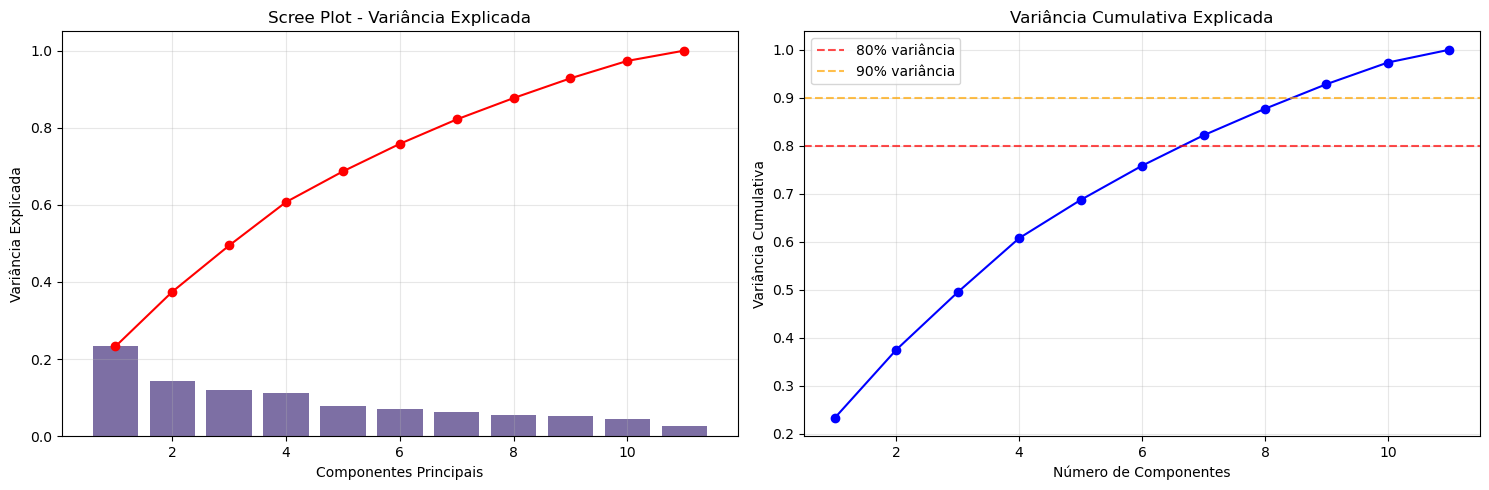


=== 2. SEPARAÇÃO ESPACIAL DOS OUTLIERS ===


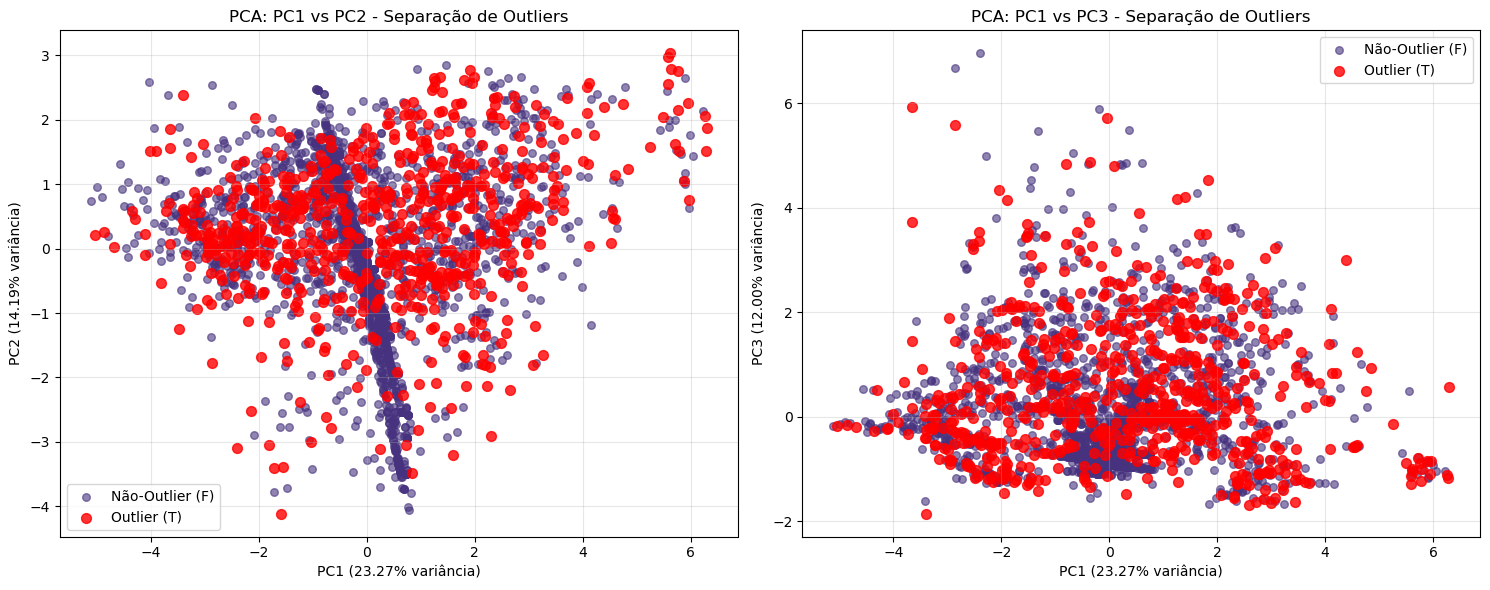


=== 3. VARIÁVEIS MAIS IMPORTANTES NOS COMPONENTES ===

--- PC1 (Variância: 23.27%) ---
  1. wv100_k_av: 0.806
  2. sW_100_av: -0.725
  3. wv_850_av: 0.586
  4. FWI_12h_av: 0.580
  5. Cape_av: -0.516

--- PC2 (Variância: 14.19%) ---
  1. 8_ny_fir_p: 0.702
  2. f_load_av: 0.698
  3. 3_8y_fir_p: -0.601
  4. wv100_k_av: 0.250
  5. FWI_12h_av: 0.205

--- PC3 (Variância: 12.00%) ---
  1. duration_p_: 0.800
  2. f_start: 0.582
  3. gT_8_7_av: 0.463
  4. 3_8y_fir_p: 0.323
  5. Cape_av: 0.103


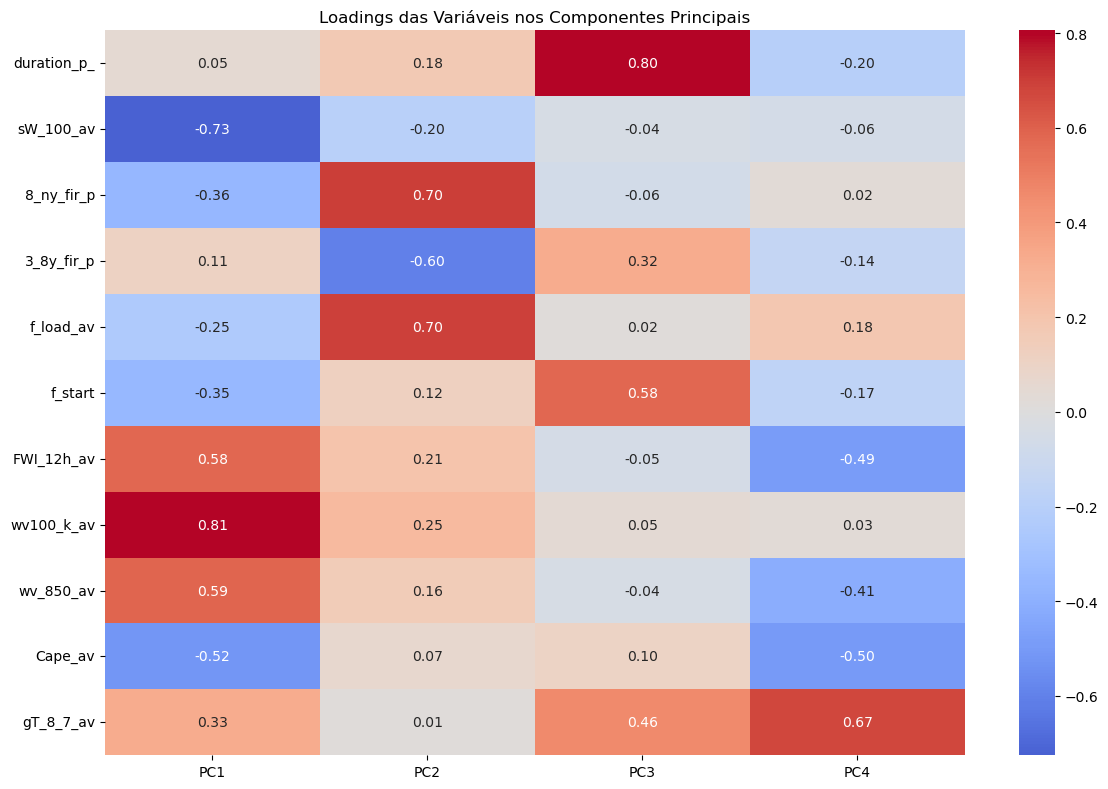


=== 4. ANÁLISE DE CLUSTERS DE OUTLIERS ===


c:\Users\dias3\miniconda3\envs\geoenv\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
c:\Users\dias3\miniconda3\envs\geoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\dias3\miniconda3\envs\geoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

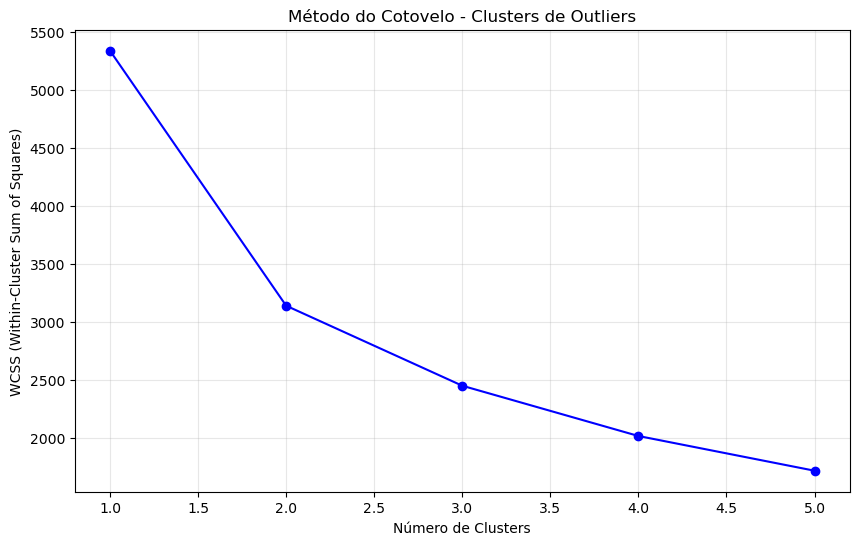

c:\Users\dias3\miniconda3\envs\geoenv\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


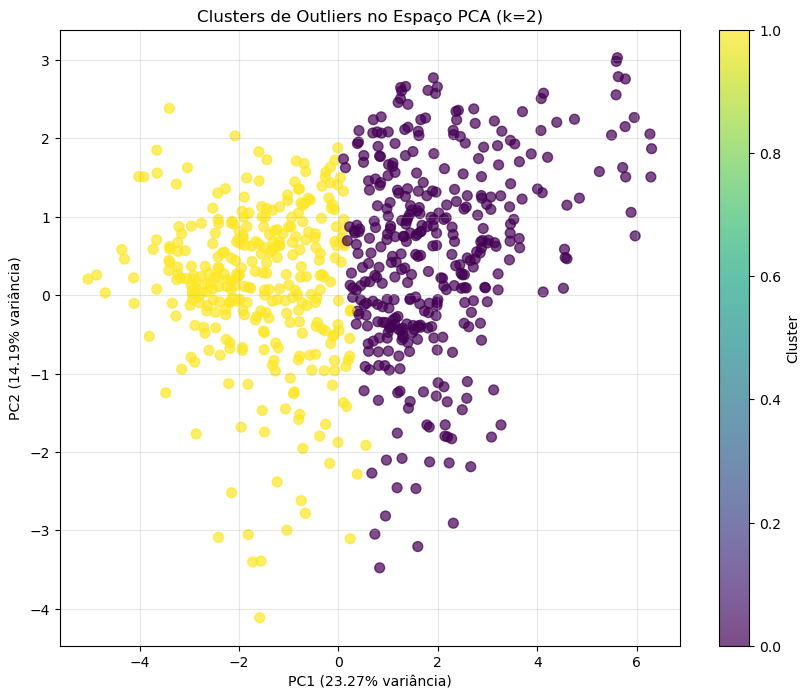

Outliers divididos em 2 clusters

Características médias por cluster:
         duration_p_  sW_100_av  8_ny_fir_p  3_8y_fir_p  f_load_av   f_start  \
cluster                                                                        
0              3.512      0.184      48.781      10.893     18.317   948.664   
1              3.883      0.233      70.222       9.728     20.012  2340.142   

         FWI_12h_av  wv100_k_av  wv_850_av  Cape_av  gT_8_7_av  
cluster                                                         
0            54.527      24.373     31.771   13.274     -6.918  
1            40.974      12.043     15.517  155.707     -7.924  

=== 5. CORRELAÇÃO COM VARIÁVEIS SHAP ===

PC1 - Top correlações com SHAP values:
  SHAP_wv100: 0.752

PC2 - Top correlações com SHAP values:
  SHAP_wv100: 0.180

PC3 - Top correlações com SHAP values:
  SHAP_wv100: -0.014

=== 6. CONCLUSÕES PRINCIPAIS ===
1. DIMENSIONALIDADE:
   - 23.3% da variância explicada pelo PC1
   - 37.5% da variância expl

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Configurações de estilo
plt.style.use('default')
sns.set_palette("viridis")

print("=== ANÁLISE PCA PARA OUTLIERS ===")

# Mapeamento das variáveis
shap_to_normal = {
    "SHAP_durat": "duration_p_",
    "SHAP_sW_10": "sW_100_av", 
    "SHAP_8_ny_": "8_ny_fir_p",
    "SHAP_3_8y_": "3_8y_fir_p",
    "SHAP_f_loa": "f_load_av",
    "SHAP_f_sta": "f_start",
    "SHAP_FWI_1": "FWI_12h_av",
    "SHAP_wv100": "wv100_k_av",
    "SHAP_wv_85": "wv_850_av",
    "SHAP_Cape_": "Cape_av",
    "SHAP_gT_8_": "gT_8_7_av"
}

# Selecionar variáveis para PCA
pca_vars = list(shap_to_normal.values())
pca_vars = [var for var in pca_vars if var in df.columns]

print(f"Variáveis selecionadas para PCA: {len(pca_vars)}")
print(pca_vars)

# Preparar dados
X = df[pca_vars].copy()

# Converter para numérico e preencher NaN
for col in pca_vars:
    X[col] = pd.to_numeric(X[col], errors='coerce')
X = X.fillna(X.median())

# Standardizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# 1. VARIÂNCIA EXPLICADA
print(f"\n=== 1. VARIÂNCIA EXPLICADA ===")
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Variância explicada por cada componente:")
for i, (var, cum_var) in enumerate(zip(explained_variance, cumulative_variance)):
    print(f"PC{i+1}: {var:.3f} ({var:.2%}) | Cumulativa: {cum_var:.3f} ({cum_var:.2%})")

# Plot de variância explicada
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Scree plot
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7)
ax1.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-')
ax1.set_xlabel('Componentes Principais')
ax1.set_ylabel('Variância Explicada')
ax1.set_title('Scree Plot - Variância Explicada')
ax1.grid(True, alpha=0.3)

# Variância cumulativa
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'bo-')
ax2.axhline(y=0.8, color='red', linestyle='--', alpha=0.7, label='80% variância')
ax2.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% variância')
ax2.set_xlabel('Número de Componentes')
ax2.set_ylabel('Variância Cumulativa')
ax2.set_title('Variância Cumulativa Explicada')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. SEPARAÇÃO ESPACIAL DOS OUTLIERS
print(f"\n=== 2. SEPARAÇÃO ESPACIAL DOS OUTLIERS ===")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PC1 vs PC2
mask = df['outlier'] == 1
ax1.scatter(X_pca[~mask, 0], X_pca[~mask, 1], alpha=0.6, label='Não-Outlier (F)', s=30)
ax1.scatter(X_pca[mask, 0], X_pca[mask, 1], alpha=0.8, label='Outlier (T)', color='red', s=50)
ax1.set_xlabel(f'PC1 ({explained_variance[0]:.2%} variância)')
ax1.set_ylabel(f'PC2 ({explained_variance[1]:.2%} variância)')
ax1.set_title('PCA: PC1 vs PC2 - Separação de Outliers')
ax1.legend()
ax1.grid(True, alpha=0.3)

# PC1 vs PC3
ax2.scatter(X_pca[~mask, 0], X_pca[~mask, 2], alpha=0.6, label='Não-Outlier (F)', s=30)
ax2.scatter(X_pca[mask, 0], X_pca[mask, 2], alpha=0.8, label='Outlier (T)', color='red', s=50)
ax2.set_xlabel(f'PC1 ({explained_variance[0]:.2%} variância)')
ax2.set_ylabel(f'PC3 ({explained_variance[2]:.2%} variância)')
ax2.set_title('PCA: PC1 vs PC3 - Separação de Outliers')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. LOADINGS - VARIÁVEIS MAIS IMPORTANTES
print(f"\n=== 3. VARIÁVEIS MAIS IMPORTANTES NOS COMPONENTES ===")

# Analisar loadings dos primeiros 3 componentes
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

for comp in range(3):
    print(f"\n--- PC{comp+1} (Variância: {explained_variance[comp]:.2%}) ---")
    comp_loadings = loadings[:, comp]
    
    # Ordenar por importância absoluta
    importance_idx = np.argsort(np.abs(comp_loadings))[::-1]
    
    for i, idx in enumerate(importance_idx[:5]):  # Top 5 variáveis
        var_name = pca_vars[idx]
        loading_value = comp_loadings[idx]
        print(f"  {i+1}. {var_name}: {loading_value:.3f}")

# Heatmap de loadings
plt.figure(figsize=(12, 8))
loadings_df = pd.DataFrame(
    loadings[:, :4],  # Primeiros 4 componentes
    index=pca_vars,
    columns=[f'PC{i+1}' for i in range(4)]
)

sns.heatmap(loadings_df, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Loadings das Variáveis nos Componentes Principais')
plt.tight_layout()
plt.show()

# 4. ANÁLISE DE CLUSTERS DE OUTLIERS
print(f"\n=== 4. ANÁLISE DE CLUSTERS DE OUTLIERS ===")

# Aplicar K-means apenas nos outliers
outliers_mask = df['outlier'] == 1
X_outliers_pca = X_pca[outliers_mask, :3]  # Usar 3 primeiros componentes

if len(X_outliers_pca) >= 3:
    # Determinar número ótimo de clusters
    wcss = []
    for i in range(1, min(6, len(X_outliers_pca))):
        kmeans = KMeans(n_clusters=i, random_state=42, n_init=10)
        kmeans.fit(X_outliers_pca)
        wcss.append(kmeans.inertia_)
    
    # Plot elbow method
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(wcss) + 1), wcss, 'bo-')
    plt.xlabel('Número de Clusters')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.title('Método do Cotovelo - Clusters de Outliers')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    # Aplicar K-means com número escolhido de clusters
    n_clusters = 2  # ou escolher baseado no gráfico acima
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    outlier_clusters = kmeans.fit_predict(X_outliers_pca)
    
    # Plot clusters de outliers
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X_outliers_pca[:, 0], X_outliers_pca[:, 1], 
                         c=outlier_clusters, cmap='viridis', s=50, alpha=0.7)
    plt.colorbar(scatter, label='Cluster')
    plt.xlabel(f'PC1 ({explained_variance[0]:.2%} variância)')
    plt.ylabel(f'PC2 ({explained_variance[1]:.2%} variância)')
    plt.title(f'Clusters de Outliers no Espaço PCA (k={n_clusters})')
    plt.grid(True, alpha=0.3)
    plt.show()
    
    print(f"Outliers divididos em {n_clusters} clusters")
    
    # Características dos clusters
    outliers_df = df[outliers_mask].copy()
    outliers_df['cluster'] = outlier_clusters
    
    print("\nCaracterísticas médias por cluster:")
    cluster_stats = outliers_df.groupby('cluster')[pca_vars].mean()
    print(cluster_stats.round(3))

# 5. CORRELAÇÃO COM VARIÁVEIS SHAP
print(f"\n=== 5. CORRELAÇÃO COM VARIÁVEIS SHAP ===")

shap_vars = [f"SHAP_{normal_var.split('_')[0]}" for normal_var in pca_vars 
             if f"SHAP_{normal_var.split('_')[0]}" in df.columns]

if shap_vars:
    # Calcular correlação entre componentes e SHAP values
    shap_correlations = []
    for i in range(3):  # Primeiros 3 componentes
        pc_scores = X_pca[:, i]
        for shap_var in shap_vars:
            if shap_var in df.columns:
                shap_values = pd.to_numeric(df[shap_var], errors='coerce')
                corr = np.corrcoef(pc_scores, shap_values.fillna(0))[0, 1]
                if not np.isnan(corr):
                    shap_correlations.append({
                        'Componente': f'PC{i+1}',
                        'Variável_SHAP': shap_var,
                        'Correlação': corr
                    })
    
    if shap_correlations:
        shap_corr_df = pd.DataFrame(shap_correlations)
        
        # Top correlações por componente
        for comp in ['PC1', 'PC2', 'PC3']:
            comp_corr = shap_corr_df[shap_corr_df['Componente'] == comp]
            comp_corr = comp_corr.sort_values('Correlação', key=abs, ascending=False)
            
            print(f"\n{comp} - Top correlações com SHAP values:")
            for _, row in comp_corr.head(3).iterrows():
                print(f"  {row['Variável_SHAP']}: {row['Correlação']:.3f}")

# 6. RESUMO DAS CONCLUSÕES
print(f"\n=== 6. CONCLUSÕES PRINCIPAIS ===")

print("1. DIMENSIONALIDADE:")
print(f"   - {cumulative_variance[0]:.1%} da variância explicada pelo PC1")
print(f"   - {cumulative_variance[1]:.1%} da variância explicada por PC1+PC2") 
print(f"   - {cumulative_variance[2]:.1%} da variância explicada por PC1+PC2+PC3")

print("\n2. SEPARAÇÃO DE OUTLIERS:")
if explained_variance[0] > 0.3:
    print("   - PC1 captura padrões importantes para distinguir outliers")
else:
    print("   - Padrões de outliers são mais complexos (distribuídos em múltiplos componentes)")

print("\n3. VARIÁVEIS CRÍTICAS:")
top_pc1_vars = np.argsort(np.abs(loadings[:, 0]))[::-1][:3]
print("   - Variáveis mais importantes no PC1:", [pca_vars[i] for i in top_pc1_vars])

print("\n4. PADRÕES DE OUTLIERS:")
if 'outlier_clusters' in locals() and n_clusters > 1:
    print(f"   - {n_clusters} tipos distintos de outliers identificados")
else:
    print("   - Outliers podem ter um padrão homogêneo")

print("\n5. COMPLEXIDADE:")
if cumulative_variance[2] > 0.8:
    print("   - Padrões relativamente simples (3 componentes capturam >80% da variância)")
else:
    print("   - Padrões complexos (múltiplas dimensões necessárias)")